# Classification Project - A study of Terry Stops in Seattle, WA

## Facts of the case of Terry vs Ohio

>The Fourth Amendment of the U.S. Constitution provides that 
>>[t]he right of the people to be secure in their persons, houses, papers, and effects, against unreasonable searches and seizures, shall not be violated, and no Warrants shall issue, but upon probable cause, supported by Oath or affirmation, and particularly describing the place to be searched, and the persons or things to be seized.
>  
>The ultimate goal of this provision is to protect people’s right to privacy and freedom from unreasonable intrusions by the government. However, the Fourth Amendment does not guarantee protection from all searches and seizures, but only those done by the government and deemed unreasonable under the law.

[law.cornell.edu](https://www.law.cornell.edu/wex/fourth_amendment "Cornell Law)  

***

>In the case of Terry vs Ohio, decided on June 10, 1968, by the United States Supreme Court, Terry and two other men were observed by a plain clothes policeman in what the officer believed to be "casing a job, a stick-up." The officer stopped and frisked the three men, and found weapons on two of them. Terry was convicted of carrying a concealed weapon and sentenced to three years in jail.
>  
>In an 8-to-1 decision, the Court held that the search undertaken by the officer was reasonable under the Fourth Amendment and that the weapons seized could be introduced into evidence against Terry. Attempting to focus narrowly on the facts of this particular case, the Court found that the officer acted on more than a "hunch" and that "a reasonably prudent man would have been warranted in believing [Terry] was armed and thus presented a threat to the officer's safety while he was investigating his suspicious behavior." The Court found that the searches undertaken were limited in scope and designed to protect the officer's safety incident to the investigation.

[Oyez.org](https://www.oyez.org/cases/1967/67 "Oyez.org")  

***

>A Terry stop in the United States allows the police to briefly detain a person based on reasonable suspicion of involvement in criminal activity. Reasonable suspicion is a lower standard than probable cause which is needed for arrest. When police stop and search a pedestrian, this is commonly known as a stop and frisk. When police stop an automobile, this is known as a traffic stop. If the police stop a motor vehicle on minor infringements in order to investigate other suspected criminal activity, this is known as a pretextual stop.
  
[Wikipedia](https://en.wikipedia.org/wiki/Terry_stop#:~:text=A%20Terry%20stop%20in%20the,as%20a%20stop%20and%20frisk "Wikipedia Terry Stop")  

***
>A terry stop is another name for stop and frisk; the name was generated from the U.S Supreme Court case Terry v. Ohio. When a police officer has a reasonable suspicion that an individual is armed, engaged, or about to be engaged, in criminal conduct, the officer may briefly stop and detain an individual for a pat-down search of outer clothing. A Terry stop is a seizure within the meaning of Fourth Amendment.
>  
>In a traffic stop setting, the Terry condition of a lawful investigatory stop is met whenever it is lawful for the police to detain an automobile and its occupants pending inquiry into a vehicular violation. The police do not need to believe that any occupant of the vehicle is involved in criminal activity.
>  
>In a recent case, Floyd v. City of New York 813 F. Supp.2d 417 (2011), the court held the New York stop-and-frisk policy violated the Fourth Amendment because it rendered stop and frisks more frequent for blacks and Hispanics.

[Legal Information Institute](https://www.law.cornell.edu/wex/terry_stop/stop_and_frisk "Legal Information Institute")  

***



## Dataset information

This data represents records of police reported stops under Terry v. Ohio, 392 U.S. 1 (1968). The dataset was created on 04/12/2017 and first published on 05/22/2018 and is provided by the city of Seattle, WA.

Each row represents a unique stop. Each record contains perceived demographics of the subject, as reported by the officer making the stop and officer demographics as reported to the Seattle Police Department, for employment purposes.

Where available, data elements from the associated Computer Aided Dispatch (CAD) event (e.g. Call Type, Initial Call Type, Final Call Type) are included.

There are 45,317 rows and 23 variables:

- **_Subject Age Group_**: 10 year increments, as reported by the officer
- **_Subject ID_**: Key, generated daily, identifying unique subjects in the dataset using a character to character match of first name and last name. "Null" values indicate an "anonymous" or "unidentified" subject.  Subjects of a Terry Stop are not required to present identification.
- **_GO / SC Num_**: General Offense or Street Check number, relating the Terry Stop to the parent report.  This field may have a one to many relationship in the data.
- **_Terry Stop ID_**: Key identifying unique Terry Stop reports
- **_Stop Resolution_**: Resolution of the stop as reported by the officer
- **_Weapon Type_**: Type of weapon, if any, identified during a search or frisk of the subject.  Indicates "none" if no weapons were found.
- **_Officer ID_**: Key identifying unique officers in the dataset
- **_Officer YOB_**: Year of birth, as reported by the officer
- **_Officer Gender_**: Gender of the officer, as reported by the officer
- **_Officer Race_**: Race of the officer, as reported by the officer
- **_Subject Perceived Race_**: Perceived race of the subject, as reported by the officer
- **_Subject Perceived Gender_**: Perceived gender of the subject, as perceived by the officer
- **_Reported Date_**: Date the report was filed in the Records Management System (RMS). Not necessarily the date the stop occurred but generally within 1 day.
- **_Reported Time_**: Time the stop was reported in the Records Management System (RMS). Not the time the stop occurred but generally within 10 hours.
- **_Initial Call Type_**: Initial classification of the call as assigned by 911.
- **_Final Call Type_**: Final classification of the call as assigned by the primary officer closing the event.
- **_Call Type_**: How the call was received by the communication center
- **_Officer Squad_**: Functional squad assignment (not budget) of the officer as reported by the Data Analytics Platform (DAP).
- **_Arrest Flag_**: Indicator of whether a "physical arrest" was made, of the subject, during the Terry Stop.  Does not necessarily reflect a report of an arrest in the Records Management System(RMS).
- **_Frisk Flag_**: Indicator of whether a "frisk" was conducted, by the officer, of the subject, during the Terry Stop.
- **_Precinct_**: Precinct of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.
- **_Sector_**: Sector of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.
- **_Beat_**: Beat of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.

Some ideas for exploration:

1. How does the probability of arrest vary by categories of different demographic variables?
2. Which variables are the strongest predictors of arrest for this dataset?
3. NOTE - these models cannot be used to predict arrest outside of the actual data recorded, as the model would build in and perpetuate any inherent bias of the officers

## Data cleaning and EDA

### Import and basic info

**Output** - terry

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, LassoLarsCV, LassoLarsIC, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, plot_confusion_matrix, confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, classification_report, roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, OneHotEncoder, StandardScaler, scale
from sklearn import metrics
from sklearn.feature_selection import VarianceThreshold, f_regression, mutual_info_regression, SelectKBest, RFE, RFECV
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.neighbors import KNeighborsClassifier
from collections import defaultdict
from sklearn.naive_bayes import GaussianNB, ComplementNB, MultinomialNB, BernoulliNB, CategoricalNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


In [2]:
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber, CB91_Purple, CB91_Violet]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)
sns.set_context("notebook", rc={"font.size":16, "axes.titlesize":20, "axes.labelsize":18})
sns.set(font='Franklin Gothic Book',
rc={'axes.axisbelow': False,
'axes.edgecolor': 'lightgrey',
'axes.facecolor': 'None',
'axes.grid': False,
'axes.labelcolor': 'dimgrey',
'axes.spines.right': False,
'axes.spines.top': False,
'axes.prop_cycle': plt.cycler(color=color_list),
'figure.facecolor': 'white',
'lines.solid_capstyle': 'round',
'patch.edgecolor': 'w',
'patch.force_edgecolor': True,
'text.color': 'dimgrey',
'xtick.bottom': False,
'xtick.color': 'dimgrey',
'xtick.direction': 'out',
'xtick.top': False,
'ytick.color': 'dimgrey',
'ytick.direction': 'out',
'ytick.left': False,
'ytick.right': False})
%matplotlib inline

In [3]:
# No null entries, 45317 records
terry = pd.read_csv('Terry_Stops.csv')
terry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45317 entries, 0 to 45316
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         45317 non-null  object
 1   Subject ID                45317 non-null  int64 
 2   GO / SC Num               45317 non-null  int64 
 3   Terry Stop ID             45317 non-null  int64 
 4   Stop Resolution           45317 non-null  object
 5   Weapon Type               45317 non-null  object
 6   Officer ID                45317 non-null  object
 7   Officer YOB               45317 non-null  int64 
 8   Officer Gender            45317 non-null  object
 9   Officer Race              45317 non-null  object
 10  Subject Perceived Race    45317 non-null  object
 11  Subject Perceived Gender  45317 non-null  object
 12  Reported Date             45317 non-null  object
 13  Reported Time             45317 non-null  object
 14  Initial Call Type     

In [4]:
# Import the data, data appears to be sorted by GO/SC Number, in which the 1st four numbers are the year
# Or possibly Terry Stop ID but I do see some out of order toward the end
# Perhaps it is sorted on Reported Date which I cannot see, or not really sorted
terry.tail(10)

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
45307,56 and Above,16366865981,20200000304239,16366787296,Field Contact,-,8758,1995,M,White,...,23:56:42,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,--PROWLER - TRESPASS,ONVIEW,TRAINING - FIELD TRAINING SQUAD,N,N,West,Q,Q3
45308,56 and Above,16689873637,20200000306763,16688826004,Field Contact,-,8308,1987,M,Hispanic or Latino,...,20:19:52,"SUSPICIOUS PERSON, VEHICLE OR INCIDENT",--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,911,WEST PCT 3RD W - QUEEN,N,N,West,Q,Q1
45309,56 and Above,16700206747,20200000329461,18068162403,Field Contact,-,8704,1988,M,White,...,23:59:23,DIST - IP/JO - DV DIST - NO ASLT,--DISTURBANCE - OTHER,911,NORTH PCT 3RD W - UNION,N,Y,North,U,U3
45310,56 and Above,16834950496,20200000307517,16833080841,Field Contact,-,7723,1987,M,White,...,17:07:59,DUI - DRIVING UNDER INFLUENCE,--SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE,911,EAST PCT 2ND W - EDWARD,N,N,East,E,E3
45311,56 and Above,17560315357,20200000316857,17560309580,Field Contact,-,8646,1996,M,White,...,02:22:45,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,ONVIEW,WEST PCT 3RD W - D/M RELIEF,N,N,West,M,M1
45312,56 and Above,17705067875,20200000321463,17722624502,Arrest,-,8486,1992,M,Asian,...,18:52:12,ASLT - IP/JO - DV,--DV - DOMESTIC VIOL/ASLT (ARREST MANDATORY),911,SOUTHWEST PCT 2ND W - FRANK,Y,N,SouthWest,F,F3
45313,56 and Above,18018113199,20200000327585,18018069307,Field Contact,-,8668,1990,F,White,...,16:38:00,TRESPASS,--PROWLER - TRESPASS,"TELEPHONE OTHER, NOT 911",SOUTH PCT 2ND W - ROBERT,N,N,South,R,R3
45314,56 and Above,18036883066,20200000328353,18036796582,Field Contact,-,8747,1991,M,White,...,11:16:36,FIGHT - IP - PHYSICAL (NO WEAPONS),--DISTURBANCE - FIGHT,911,TRAINING - FIELD TRAINING SQUAD,N,N,West,K,K3
45315,56 and Above,18763121119,20200000334915,18760675122,Field Contact,-,7456,1979,M,White,...,18:25:31,ASSIST OTHER AGENCY - ROUTINE SERVICE,--ASSIST OTHER AGENCY - STATE AGENCY,ONVIEW,NORTH PCT 2ND W - JOHN RELIEF,N,N,North,N,N2
45316,56 and Above,19145427342,20200000345283,19145423883,Field Contact,Knife/Cutting/Stabbing Instrument,8646,1996,M,White,...,23:02:58,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,ONVIEW,WEST PCT 3RD W - D/M RELIEF,N,Y,West,Q,Q3


In [5]:
# Only mostly sorted on Date, some out of order
terry['Reported Date'][45300:45318]

45300    2020-10-08T00:00:00
45301    2020-10-15T00:00:00
45302    2020-10-18T00:00:00
45303    2020-10-19T00:00:00
45304    2020-10-19T00:00:00
45305    2020-10-19T00:00:00
45306    2020-10-28T00:00:00
45307    2020-10-26T00:00:00
45308    2020-10-29T00:00:00
45309    2020-11-26T00:00:00
45310    2020-10-30T00:00:00
45311    2020-11-11T00:00:00
45312    2020-11-17T00:00:00
45313    2020-11-24T00:00:00
45314    2020-11-25T00:00:00
45315    2020-12-03T00:00:00
45316    2020-12-15T00:00:00
Name: Reported Date, dtype: object

In [6]:
terry.isna().sum()

Subject Age Group             0
Subject ID                    0
GO / SC Num                   0
Terry Stop ID                 0
Stop Resolution               0
Weapon Type                   0
Officer ID                    0
Officer YOB                   0
Officer Gender                0
Officer Race                  0
Subject Perceived Race        0
Subject Perceived Gender      0
Reported Date                 0
Reported Time                 0
Initial Call Type             0
Final Call Type               0
Call Type                     0
Officer Squad               603
Arrest Flag                   0
Frisk Flag                    0
Precinct                      0
Sector                        0
Beat                          0
dtype: int64

### Analyze 'Subject Age Group'

Changed age group of '-' to 'Unknown'.  
All of these values occur at the beginning of the dataset, so they may have more to do with WHEN they were recorded.

In [7]:
# Starting analysis of first variable, Subject Age Group
# Information is nicely binned into groups, presumably this is perceived age unless the subject provided identification.
# Will change '-' values to unknown
terry['Subject Age Group'].value_counts()

26 - 35         15054
36 - 45          9557
18 - 25          9169
46 - 55          5852
56 and Above     2301
1 - 17           1935
-                1449
Name: Subject Age Group, dtype: int64

In [8]:
# Is this a coincidence?  The unknown age records are 1449 of the first 1459 records.
# Probably they didn't start keeping track of Subject Age right away
# If the unknown ages appear relevent, it may have more to do with the date than the actual subject's age
init_terry=terry[:1459]
init_terry[init_terry['Subject Age Group'] != '-']
# Some of these early records with ages belong to the same GO/SC Num
# Seems like they just transitioned to start recording age group at this point

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
214,36 - 45,-1,20150000001902,35955,Field Contact,None,7595,1978,M,White,...,04:59:00,-,-,-,NaN,N,N,-,-,-
334,36 - 45,-1,20150000001920,36225,Field Contact,None,7595,1978,M,White,...,05:20:00,-,-,-,NaN,N,N,-,-,-
1067,1 - 17,-1,20150000002531,47538,Field Contact,None,7415,1978,M,White,...,01:25:00,-,-,-,NORTH PCT 3RD W - JOHN RELIEF,N,N,-,-,-
1095,1 - 17,-1,20150000002613,49001,Field Contact,None,7673,1985,M,White,...,23:19:00,-,-,-,WEST PCT 2ND W - KING,N,N,-,-,-
1151,1 - 17,-1,20150000002531,47539,Field Contact,None,7415,1978,M,White,...,01:58:00,-,-,-,NORTH PCT 3RD W - JOHN RELIEF,N,N,-,-,-
1235,1 - 17,-1,20150000002531,47540,Field Contact,None,7415,1978,M,White,...,01:59:00,-,-,-,NORTH PCT 3RD W - JOHN RELIEF,N,N,-,-,-
1288,1 - 17,-1,20150000002531,47541,Field Contact,None,7415,1978,M,White,...,02:01:00,-,-,-,NORTH PCT 3RD W - JOHN RELIEF,N,N,-,-,-
1369,1 - 17,-1,20150000002611,48895,Field Contact,None,7726,1990,M,White,...,17:17:00,-,-,-,WEST PCT 2ND W - MARY,N,N,-,-,-
1422,1 - 17,-1,20150000002613,48899,Field Contact,None,7673,1985,M,White,...,23:13:00,-,-,-,WEST PCT 2ND W - KING,N,N,-,-,-
1448,1 - 17,-1,20150000002613,48900,Field Contact,None,7673,1985,M,White,...,23:18:00,-,-,-,WEST PCT 2ND W - KING,N,N,-,-,-


In [9]:
# Think I am ok to replace '-' with 'unknown'
terry['Subject Age Group'] = terry['Subject Age Group'].replace(to_replace='-',value='Unknown')
terry['Subject Age Group'].value_counts()

26 - 35         15054
36 - 45          9557
18 - 25          9169
46 - 55          5852
56 and Above     2301
1 - 17           1935
Unknown          1449
Name: Subject Age Group, dtype: int64

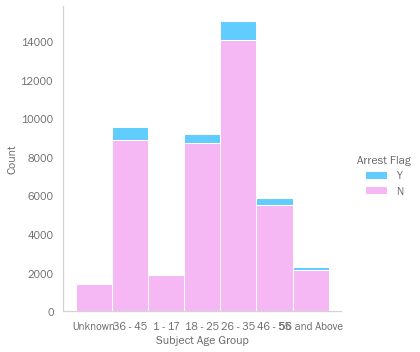

In [10]:
sns.displot(terry, x='Subject Age Group', hue_order=('Y','N'), hue='Arrest Flag', multiple='stack');

### Analyze 'Subject ID'

**Output** - terry_sort

Binned Subject ID into a new column Subject Known with values of Unidentified, First, Repeat, then deleted Subject ID column

In [11]:
# Now look at duplicate Subject ID
terry['Subject ID'].value_counts() # 8249 unique values

-1              34718
 7726859935        19
 7753260438        13
 7727117712        12
 7726559999         9
                ...  
 7725797630         1
 16168302851        1
 7704469768         1
 7733768490         1
 16219707395        1
Name: Subject ID, Length: 8249, dtype: int64

In [12]:
# There are 8249 different "subject IDs" even though most of the are -1, which I assume is their version of unknown.
# Many seem to be duplicated several times.  Does this indicate multiple times the same person was stopped?  
# Can I somehow look at people who were stopped multiple times?
# Let's first change the -1 to unidentified so I don't think they are duplicates
terry['Subject ID'] = terry['Subject ID'].astype(str)
terry['Subject ID'] = terry['Subject ID'].replace(to_replace='-1',value='Unidentified')
terry['Subject ID'].value_counts()

Unidentified    34718
7726859935         19
7753260438         13
7727117712         12
7726559999          9
                ...  
7743484278          1
9641131779          1
12831978739         1
7727212733          1
7731079108          1
Name: Subject ID, Length: 8249, dtype: int64

My initial reaction was that Subject ID doesn't matter and can be removed.  There are 8249 unique values and I certainly don't want that many dummy variables.  But I wonder if it is possible that by a subject NOT identifying themselves (i.e. Subject ID = -1), they could be more or less likely to be arrested.  Same concern about Subject IDs that have many repeat encounters... maybe they are more or less likely to be arrested.  I'm considering binning the info somehow... into 'unidentified', 'first encounter', 'repeat encounter'. Does the officer know it is a repeat encounter if it happened with a different officer?

In [13]:
# This value is interesting to see who has been stopped more than once
# Several people appear to be repeatedly stopped
# The question is: Do I want to consider Subject ID in this analysis?
# If I encode it I will have 8249 more variables
subject_known = terry[terry['Subject ID'] != 'Unidentified']
subject_known[subject_known.duplicated(subset=['Subject ID'], keep=False)]['Subject ID'].value_counts()

7726859935    19
7753260438    13
7727117712    12
7726559999     9
7727600619     9
              ..
7726642372     2
7728114931     2
7726686879     2
7729567601     2
7726953016     2
Name: Subject ID, Length: 1438, dtype: int64

In [14]:
# There are 1438 unique subject IDs that are repeated at least once. Can I map the Subject ID to a new column?
terry_sort = terry.sort_values(['Reported Date', 'Reported Time']) #sort by date and time first
Subject_First = []
Subjects = []
for subject in range(0,len(terry_sort)):
    if terry_sort['Subject ID'][subject] == "Unidentified":
        Subjects.append('Unidentified')
    elif terry_sort['Subject ID'][subject] in Subject_First:
        Subjects.append('Repeat')
    else:
        Subjects.append('First')
        Subject_First.append(terry_sort['Subject ID'][subject])

In [15]:
terry_sort['Subject Known'] = pd.Series(Subjects, index = terry.index)

In [16]:
terry_sort['Subject Known'].value_counts()

Unidentified    34718
First            8248
Repeat           2351
Name: Subject Known, dtype: int64

In [17]:
# Just checking that my sort worked and the index matched up
(terry_sort[(terry_sort.duplicated(subset=['Subject ID'], keep=False)) & 
            (terry_sort['Subject ID']!='Unidentified')]).sort_values('Subject ID')

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat,Subject Known
12009,18 - 25,10042368279,20200000095287,12775150617,Arrest,-,8394,1991,M,White,...,SHOPLIFT - THEFT,--BURGLARY - NON RESIDENTIAL/COMMERCIAL,911,NORTH PCT 3RD W - UNION,Y,Y,North,U,U2,First
12010,18 - 25,10042368279,20200000182733,13357757706,Field Contact,Knife/Cutting/Stabbing Instrument,6334,1974,M,White,...,"DISTURBANCE, MISCELLANEOUS/OTHER",--CRISIS COMPLAINT - GENERAL,911,NORTH PCT 1ST W - UNION,N,Y,North,U,U1,Repeat
36633,36 - 45,10045452578,20190000326602,10045469204,Arrest,-,8632,1997,M,White,...,"NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)",--WARRANT SERVICES - MISDEMEANOR,911,WEST PCT 2ND W - DAVID,Y,N,West,D,D1,First
36634,36 - 45,10045452578,20200000202621,13806256374,Arrest,-,7690,1977,M,White,...,ORDER - VIOLATION OF COURT ORDER (NON DV),"--ASSAULTS - HARASSMENT, THREATS",911,WEST PCT 1ST W - DAVID/MARY,Y,N,West,D,D2,Repeat
36637,36 - 45,10045502278,20200000111289,12802772614,Field Contact,-,8696,1996,M,White,...,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,ONVIEW,TRAINING - FIELD TRAINING SQUAD,N,N,West,M,M1,Repeat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42731,46 - 55,9879252608,20200000171525,13254286419,Field Contact,-,8459,1990,M,Hispanic or Latino,...,PROPERTY - DAMAGE,--PROPERTY DEST (DAMG),ONVIEW,WEST PCT 2ND W - D/M RELIEF,N,N,West,M,M2,Repeat
26737,26 - 35,9928085824,20190000322078,9928079386,Field Contact,-,8656,1988,M,White,...,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),"--ASSAULTS, OTHER",911,TRAINING - FIELD TRAINING SQUAD,N,N,North,N,N3,First
26738,26 - 35,9928085824,20200000096497,12778521884,Field Contact,Knife/Cutting/Stabbing Instrument,6800,1972,M,White,...,"WEAPN-IP/JO-GUN,DEADLY WPN (NO THRT/ASLT/DIST)","--WEAPON,PERSON WITH - OTHER WEAPON",911,NORTH PCT 1ST W - B/N RELIEF (JOHN),N,Y,North,N,N3,Repeat
26740,26 - 35,9972151245,20190000444352,11910224956,Field Contact,-,7773,1978,M,White,...,"WEAPN-IP/JO-GUN,DEADLY WPN (NO THRT/ASLT/DIST)","--WEAPON,PERSON WITH - OTHER WEAPON",911,NORTH PCT 3RD W - B/N RELIEF,N,Y,North,J,J3,Repeat


In [18]:
# OK I'm going to reset the index for clarity and I do not need Subject ID anymore
terry_sort.reset_index(drop=True, inplace=True)
terry_sort.drop(columns='Subject ID', axis=1, inplace=True)

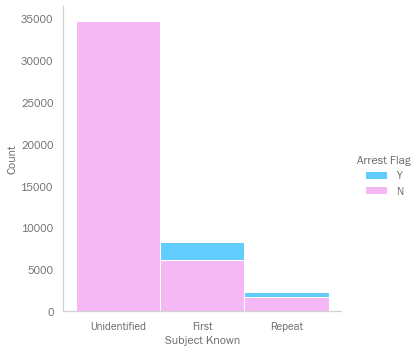

In [19]:
sns.displot(terry_sort, x='Subject Known', hue_order=('Y','N'), hue='Arrest Flag', multiple='stack');

### Analyze 'GO / SC Num'

Parent report ID number seems irrelevant to my model.  Dropped this column.

In [20]:
# This field is related to the parent report id number.  There are 35439 unique values.
# I do not see how this field could be relevent and I do not want 35439 dummy variables.
# So I will drop this variable.
terry_sort['GO / SC Num'].value_counts()

20150000190790    16
20160000378750    16
20180000134604    14
20170000132836    13
20190000441736    13
                  ..
20160000292906     1
20150000281640     1
20190000105516     1
20200000057387     1
20180000071981     1
Name: GO / SC Num, Length: 35439, dtype: int64

In [21]:
terry_sort.drop(columns='GO / SC Num', axis=1, inplace=True)
terry_sort.head()

,Subject Age Group,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,...,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat,Subject Known
0,1 - 17,28020,Referred for Prosecution,Lethal Cutting Instrument,4585,1955,M,Hispanic or Latino,Black or African American,Female,...,-,-,-,NaN,N,Y,East,G,G2,Unidentified
1,18 - 25,305901,Arrest,None,7661,1984,M,White,Black or African American,Male,...,-,-,-,NaN,N,N,West,M,M3,Unidentified
2,36 - 45,28092,Field Contact,None,7634,1977,M,White,Multi-Racial,Male,...,-,-,-,NaN,N,N,-,-,-,Unidentified
3,18 - 25,28093,Field Contact,None,7634,1977,M,White,White,Male,...,-,-,-,NaN,N,N,-,-,-,Unidentified
4,26 - 35,28381,Field Contact,None,7634,1977,M,White,White,Male,...,-,-,-,NaN,N,N,-,-,-,Unidentified


### Analyze 'Terry Stop ID'

Found duplicates that appear to be same subject, same stop, but a different weapon.  
Kept the first duplicate and changed Weapon Type to Multiple.
Then drop Terry Stop ID column.

In [22]:
terry_sort['Terry Stop ID'].value_counts()

15045077325    3
13080077761    3
12119304761    2
12105013403    2
15595812669    2
              ..
490528         1
8705875089     1
13103094430    1
154270         1
65536          1
Name: Terry Stop ID, Length: 45292, dtype: int64

In [23]:
terry_sort[terry_sort.duplicated
           (subset=['Terry Stop ID'], keep=False)
          ].loc[:,['Subject Known','Terry Stop ID', 'Weapon Type', 'Stop Resolution', 'Reported Date','Arrest Flag']]
# 48 rows of duplicates, otherwise a unique key
# But what do these duplicates mean?
# Same subject, same stop, same resolution, different weapons, same officer
# It appears the officer enters a new record for each weapon found
# But this isn't really a new arrest... it is the same subject, same officer, same stop, same arrest (or non-arrest)
# Need to check, are the outcomes ever actually different? No
# The outcomes are not different.  It just looks like two (or more) weapons for the same subject at the same stop.
# What will this do to my models?
# Can I somehow capture that 2 weapons were found?
# My instinct says to drop these duplicates.  The stop id is not actually relevent.
# Perhaps change the Weapon Type to include both types
# Given that only 6% of the stops result in arrest, and half of these 2 weapon stops result in arrest, I think it is significant.
# Since I am considering changing the weapon to to 'Multiple', let's analyze that variable first.

,Subject Known,Terry Stop ID,Weapon Type,Stop Resolution,Reported Date,Arrest Flag
35968,First,8611673538,Blunt Object/Striking Implement,Field Contact,2019-07-12T00:00:00,N
35969,Repeat,8611673538,Knife/Cutting/Stabbing Instrument,Field Contact,2019-07-12T00:00:00,N
36162,First,8677596250,Knife/Cutting/Stabbing Instrument,Offense Report,2019-07-22T00:00:00,N
36163,Repeat,8677596250,Taser/Stun Gun,Offense Report,2019-07-22T00:00:00,N
36428,First,9585545373,Firearm,Field Contact,2019-08-03T00:00:00,N
36429,Repeat,9585545373,Handgun,Field Contact,2019-08-03T00:00:00,N
38928,First,12034618758,Knife/Cutting/Stabbing Instrument,Arrest,2019-12-08T00:00:00,Y
38929,Repeat,12034618758,Other Firearm,Arrest,2019-12-08T00:00:00,Y
39126,First,12105013403,Knife/Cutting/Stabbing Instrument,Arrest,2019-12-17T00:00:00,Y
39127,Repeat,12105013403,Mace/Pepper Spray,Arrest,2019-12-17T00:00:00,Y


In [24]:
# These are not really Repeat stops as my new Subject Known indicates
# I am going to change these records Weapon Type to Multiple and then delete the duplicate record

terry_sort.loc[terry_sort[terry_sort.duplicated(subset=['Terry Stop ID'], keep=False)].index,'Weapon Type'] = 'Multiple'
terry_sort.drop_duplicates(subset=['Terry Stop ID'], keep='first', inplace=True)
terry_sort.shape

(45292, 22)

In [25]:
# Now delete the Terry Stop ID column
terry_sort.reset_index(drop=True, inplace=True)
terry_sort.drop(columns=['Terry Stop ID'], inplace=True)
terry_sort.tail()

,Subject Age Group,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,...,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat,Subject Known
45287,26 - 35,Field Contact,-,6353,1972,M,White,White,Male,2020-12-15T00:00:00,...,TRESPASS,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,911,WEST PCT 1ST W - DAVID/MARY,N,N,West,M,M2,First
45288,26 - 35,Field Contact,-,6353,1972,M,White,White,Male,2020-12-15T00:00:00,...,TRESPASS,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,911,WEST PCT 1ST W - DAVID/MARY,N,N,West,M,M2,First
45289,36 - 45,Arrest,-,8719,1996,M,Asian,Black or African American,Male,2020-12-15T00:00:00,...,FIGHT - IP - PHYSICAL (NO WEAPONS),"--ASSAULTS, OTHER",911,NORTH PCT 2ND W - L/U RELIEF,Y,N,North,U,U2,First
45290,18 - 25,Field Contact,-,8639,1995,M,White,Black or African American,Male,2020-12-15T00:00:00,...,SUICIDE - IP/JO SUICIDAL PERSON AND ATTEMPTS,--CRISIS COMPLAINT - GENERAL,911,WEST PCT 3RD W - QUEEN,N,N,West,Q,Q3,Repeat
45291,56 and Above,Field Contact,Knife/Cutting/Stabbing Instrument,8646,1996,M,White,Black or African American,Male,2020-12-15T00:00:00,...,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,ONVIEW,WEST PCT 3RD W - D/M RELIEF,N,Y,West,Q,Q3,First


### Analyze 'Weapon Type'

Binned some obvious types together.  May consider just using weapon found or no weapon found.

In [26]:
terry_sort['Weapon Type'].value_counts()
# The '-' should probably be changed to 'Unknown" or maybe it actually means 'None'. I'm going to choose None because I 
# believe that is mostly likely what the reports meant.
# None/Not Applicable should be combined with None
# Firearm Other should be combined with Other Firearm
# Should Club and Blackjack and Brass Knuckles be combined with Club, Blackjack, Brass Knuckles?
# I need to think backward from what I would like my results to tell me.  Is it useful to know the 'Firearm' is significant, 
# but Other Firearm is not? I don't think so. Perhaps the best solution is just weapon vs no weapon.  But for now I will combine
# some categories that seem obvious

None                                 32565
-                                    10119
Lethal Cutting Instrument             1482
Knife/Cutting/Stabbing Instrument      499
Handgun                                280
Firearm Other                          100
Blunt Object/Striking Implement         59
Club, Blackjack, Brass Knuckles         49
Firearm                                 30
Multiple                                23
Mace/Pepper Spray                       17
Other Firearm                           16
Firearm (unk type)                      15
Club                                     9
None/Not Applicable                      7
Rifle                                    7
Taser/Stun Gun                           5
Fire/Incendiary Device                   3
Shotgun                                  3
Automatic Handgun                        2
Brass Knuckles                           1
Blackjack                                1
Name: Weapon Type, dtype: int64

In [27]:
# Going to group some together
weapon_dict = {'-' : 'None',
               'None/Not Applicable' : 'None',
               'Lethal Cutting Instrument' : 'Knife/Cutting/Stabbing Instrument',
               'Firearm Other' : 'Firearm',
               'Other Firearm' : 'Firearm',
               'Blunt Object/Striking Implement' : 'Other',
               'Club, Blackjack, Brass Knuckles' : 'Other',
               'Club' : 'Other',
               'Blackjack' : 'Other',
               'Brass Knuckles' : 'Other',
               'Mace/Pepper Spray' : 'Other',
               'Firearm (unk type)' : 'Firearm',
               'Rifle' : 'Other',
               'Taser/Stun Gun' : 'Other',
               'Fire/Incendiary Device' : 'Other',
               'Shotgun' : 'Other',
               'Automatic Handgun' : 'Handgun'}

for k, v in weapon_dict.items():
    terry_sort['Weapon Type'] = terry_sort['Weapon Type'].replace(to_replace = k, value = v)

terry_sort['Weapon Type'].value_counts()

None                                 42691
Knife/Cutting/Stabbing Instrument     1981
Handgun                                282
Firearm                                161
Other                                  154
Multiple                                23
Name: Weapon Type, dtype: int64

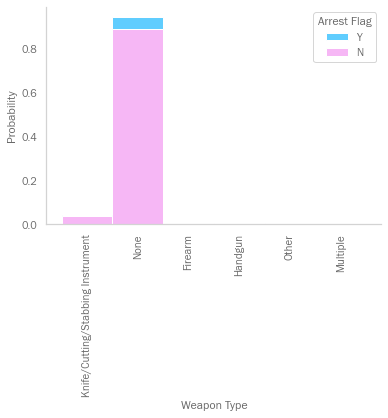

In [28]:
sns.histplot(terry_sort, x='Weapon Type', hue_order=('Y','N'), hue='Arrest Flag', multiple='stack', stat='probability')
plt.xticks(rotation=90);

In [29]:
# Only 283 cases where Arrest Flag is Y and Weapon Type is NOT None
terry_sort[(terry_sort['Arrest Flag'] == 'Y') & (terry_sort['Weapon Type'] != 'None')]

,Subject Age Group,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,...,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat,Subject Known
34576,26 - 35,Arrest,Knife/Cutting/Stabbing Instrument,7765,1985,M,White,White,Male,2019-05-09T00:00:00,...,"WEAPN - GUN,DEADLY WPN (NO THRTS/ASLT/DIST)","--WEAPON,PERSON WITH - OTHER WEAPON",ONVIEW,WEST PCT 1ST W - DAVID/MARY,Y,Y,-,-,-,First
34616,46 - 55,Arrest,Handgun,8507,1987,M,White,White,Male,2019-05-11T00:00:00,...,FIGHT - IP/JO - WITH WEAPONS,"--ASSAULTS - HARASSMENT, THREATS","TELEPHONE OTHER, NOT 911",SOUTH PCT 2ND W - ROBERT,Y,Y,South,R,R1,First
34662,36 - 45,Arrest,Other,7792,1987,M,White,White,Male,2019-05-14T00:00:00,...,ROBBERY - IP/JO (INCLUDES STRONG ARM),--ROBBERY - STRONG ARM,911,EAST PCT 2ND W - CHARLIE RELIEF,Y,Y,-,-,-,First
34802,1 - 17,Arrest,Knife/Cutting/Stabbing Instrument,7782,1986,M,White,Black or African American,Male,2019-05-20T00:00:00,...,THREATS (INCLS IN-PERSON/BY PHONE/IN WRITING),"--ASSAULTS, OTHER","TELEPHONE OTHER, NOT 911",EAST PCT 2ND W - CHARLIE RELIEF,Y,Y,East,G,G1,First
34863,18 - 25,Arrest,Handgun,7677,1983,M,White,-,Male,2019-05-23T00:00:00,...,"WEAPN-IP/JO-GUN,DEADLY WPN (NO THRT/ASLT/DIST)","--ASSAULTS - HARASSMENT, THREATS",911,SOUTH PCT 2ND W - ROBERT,Y,Y,South,S,S1,First
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45108,46 - 55,Arrest,Other,8597,1990,M,Asian,Unknown,Male,2020-11-28T00:00:00,...,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),"--ASSAULTS, OTHER",911,EAST PCT 3RD W - EDWARD,Y,Y,East,E,E2,First
45110,56 and Above,Arrest,Knife/Cutting/Stabbing Instrument,8701,1994,M,Two or More Races,American Indian or Alaska Native,Male,2020-11-28T00:00:00,...,TRESPASS,--PROWLER - TRESPASS,911,WEST PCT 3RD W - QUEEN,Y,Y,West,Q,Q3,Repeat
45145,26 - 35,Arrest,Knife/Cutting/Stabbing Instrument,8719,1996,M,Asian,Black or African American,Male,2020-12-03T00:00:00,...,UNKNOWN - ANI/ALI - WRLS PHNS (INCL OPEN LINE),"--ASSAULTS - HARASSMENT, THREATS",911,NORTH PCT 2ND W - L/U RELIEF,Y,Y,North,U,U1,First
45170,26 - 35,Arrest,Other,8643,1989,F,White,Black or African American,Male,2020-12-05T00:00:00,...,DIST - IP/JO - DV DIST - NO ASLT,--DV - DOMESTIC VIOLENCE (ARREST DISCRETIONARY),911,NORTH PCT 2ND W - L/U RELIEF,Y,Y,North,U,U3,Repeat


### Analyze 'Stop Resolution'

I was a bit concerned that Stop Resolution is a perfect predictor for Arrest Flag, since only 2 of the Arrest Flag = Y do NOT have Stop Resolution = arrest. However, since there are so many Stop Resolutions of 'arrest' that don't lead to an arrest flag of Y, I guess the models will have to predict on other information.  I'm going to choose to leave it as is for now. 

In [30]:
terry_sort['Stop Resolution'].value_counts()

Field Contact               18265
Offense Report              15194
Arrest                      10928
Referred for Prosecution      728
Citation / Infraction         177
Name: Stop Resolution, dtype: int64

In [31]:
terry_sort[(terry_sort['Stop Resolution']=='Arrest') & (terry_sort['Arrest Flag']=='Y')]

,Subject Age Group,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,...,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat,Subject Known
34541,26 - 35,Arrest,None,7758,1987,M,White,White,Male,2019-05-08T00:00:00,...,BURG - IP/JO - RES (INCL UNOCC STRUCTURES),--NARCOTICS - NARS REPORT,911,EAST PCT 1ST W - E/G RELIEF (CHARLIE),Y,N,East,E,E1,First
34546,56 and Above,Arrest,None,8527,1990,M,Hispanic or Latino,Black or African American,Male,2019-05-08T00:00:00,...,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),"--ASSAULTS - HARASSMENT, THREATS",911,SOUTHWEST PCT - 1ST WATCH - F/W RELIEF,Y,N,-,-,-,First
34560,18 - 25,Arrest,None,7794,1991,M,White,White,Male,2019-05-09T00:00:00,...,"WEAPN - GUN,DEADLY WPN (NO THRTS/ASLT/DIST)","--WEAPON, PERSON WITH - GUN",911,NORTH PCT 1ST W - LINCOLN,Y,Y,North,L,L2,First
34567,46 - 55,Arrest,None,7765,1985,M,White,White,Male,2019-05-09T00:00:00,...,SHOPLIFT - THEFT,--BURGLARY - NON RESIDENTIAL/COMMERCIAL,"TELEPHONE OTHER, NOT 911",WEST PCT 1ST W - DAVID/MARY,Y,N,-,-,-,First
34576,26 - 35,Arrest,Knife/Cutting/Stabbing Instrument,7765,1985,M,White,White,Male,2019-05-09T00:00:00,...,"WEAPN - GUN,DEADLY WPN (NO THRTS/ASLT/DIST)","--WEAPON,PERSON WITH - OTHER WEAPON",ONVIEW,WEST PCT 1ST W - DAVID/MARY,Y,Y,-,-,-,First
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45273,36 - 45,Arrest,None,8702,1979,M,White,Unknown,Male,2020-12-14T00:00:00,...,ASLT - IP/JO - DV,--DV - DOMESTIC VIOL/ASLT (ARREST MANDATORY),911,NORTH PCT 3RD W - B/N RELIEF,Y,Y,North,L,L1,First
45279,18 - 25,Arrest,None,8749,1993,M,Asian,White,Male,2020-12-14T00:00:00,...,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),"--ASSAULTS, OTHER",911,TRAINING - FIELD TRAINING SQUAD,Y,Y,-,-,-,First
45283,26 - 35,Arrest,None,8759,1996,M,Asian,Black or African American,Male,2020-12-14T00:00:00,...,BURG - IP/JO - RES (INCL UNOCC STRUCTURES),--BURGLARY - RESIDENTIAL OCCUPIED,911,TRAINING - FIELD TRAINING SQUAD,Y,Y,South,R,R2,First
45285,36 - 45,Arrest,None,8425,1989,M,White,White,Male,2020-12-15T00:00:00,...,WARRANT - MISD WARRANT PICKUP,--WARRANT SERVICES - MISDEMEANOR,"TELEPHONE OTHER, NOT 911",WEST PCT 3RD W - KING,Y,N,West,K,K2,First


In [32]:
terry_sort[(terry_sort['Stop Resolution']!='Arrest') & (terry_sort['Arrest Flag']=='Y')]

,Subject Age Group,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,...,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat,Subject Known
36377,56 and Above,Referred for Prosecution,None,8643,1989,F,White,White,Male,2019-08-02T00:00:00,...,PERSON IN BEHAVIORAL/EMOTIONAL CRISIS,--CRISIS COMPLAINT - GENERAL,911,TRAINING - FIELD TRAINING SQUAD,Y,N,West,M,M2,First
39812,36 - 45,Referred for Prosecution,None,8582,1991,M,White,Black or African American,Female,2020-01-23T00:00:00,...,"DISTURBANCE, MISCELLANEOUS/OTHER",--WARRANT SERVICES - MISDEMEANOR,911,SOUTHWEST PCT 3RD W - WILLIAM,Y,N,SouthWest,W,W2,Repeat


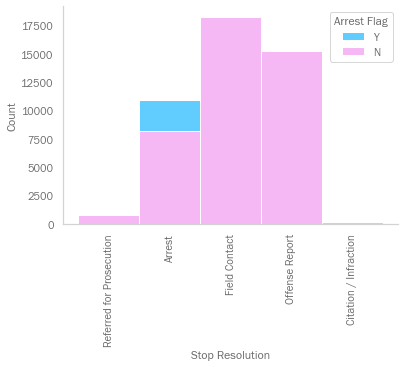

In [33]:
sns.histplot(terry_sort, x='Stop Resolution', hue_order=('Y','N'), hue='Arrest Flag', multiple='stack')
plt.xticks(rotation=90);

### Analyze 'Officer ID'

Strip spaces, replace - and -9 with Unknown.  Binned top 10 and changed the rest to Other.

In [34]:
terry_sort['Officer ID'].unique()
# There are 1183 unique values, with some officers generating hundreds of stops and some only one

array(['4585  ', '7661  ', '7634  ', ..., '8765  ', '8772  ', '8751  '],
      dtype=object)

In [35]:
# I noticed some value of -9.  Let's look at them.
indices=[]
for i,x in enumerate(terry_sort['Officer ID']):
    if x.startswith('-'):
        indices.append(i)

terry_sort.iloc[indices,:]

,Subject Age Group,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,...,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat,Subject Known
427,18 - 25,Field Contact,None,-9,1900,N,Unknown,Black or African American,Male,2015-05-19T00:00:00,...,-,-,-,NaN,N,N,-,-,-,Unidentified
7101,36 - 45,Field Contact,None,-9,1900,N,Unknown,White,Female,2016-01-02T00:00:00,...,-,-,-,NaN,N,N,North,N,N3,Unidentified
12857,36 - 45,Field Contact,None,-9,1900,N,Unknown,White,Male,2016-09-14T00:00:00,...,-,-,-,NaN,N,N,-,-,-,Unidentified
17770,18 - 25,Field Contact,None,-9,1900,N,Unknown,Unknown,Female,2017-06-06T00:00:00,...,-,-,-,NaN,N,N,-,-,-,Unidentified
23085,18 - 25,Arrest,None,-9,1900,N,Unknown,White,Male,2018-02-07T00:00:00,...,-,-,-,NaN,N,N,West,Q,Q1,Unidentified
35225,36 - 45,Field Contact,None,-,1900,N,Unknown,Black or African American,Male,2019-06-06T00:00:00,...,-,-,-,NaN,N,Y,South,S,S1,First
35904,36 - 45,Field Contact,None,-,1900,N,Unknown,-,Female,2019-07-09T00:00:00,...,-,-,-,NaN,N,N,West,Q,Q2,First
35995,46 - 55,Field Contact,None,-,1900,N,Unknown,Black or African American,Male,2019-07-13T00:00:00,...,-,-,-,NaN,N,N,West,M,M1,First
36138,36 - 45,Field Contact,None,-,1900,N,Unknown,White,Male,2019-07-21T00:00:00,...,-,-,-,NaN,N,N,West,Q,Q1,First
36238,Unknown,Field Contact,None,-,1900,N,Unknown,-,-,2019-07-27T00:00:00,...,-,-,-,NaN,N,Y,West,K,K3,Unidentified


In [36]:
terry_sort[~terry_sort.duplicated(subset = 'Officer ID', keep=False)]
# 79 Officer IDs only occur once

,Subject Age Group,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,...,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat,Subject Known
30,26 - 35,Arrest,None,5143,1957,M,Black or African American,Black or African American,Male,2015-03-19T00:00:00,...,ROBBERY - IP/JO (INCLUDES STRONG ARM),--ROBBERY - STRONG ARM,911,NaN,N,Y,East,C,C1,Unidentified
90,26 - 35,Field Contact,None,4320,1956,M,White,Black or African American,Male,2015-04-01T00:00:00,...,-,-,-,NaN,N,N,-,-,-,Unidentified
603,26 - 35,Field Contact,None,7448,1972,M,White,Black or African American,Male,2015-05-24T00:00:00,...,-,-,-,WEST PCT 2ND W - KING BEATS,N,N,Southwest,W,W3,Unidentified
764,26 - 35,Field Contact,None,5712,1961,M,White,White,Male,2015-05-28T00:00:00,...,-,-,-,EAST PCT 3RD W - CHARLIE,N,Y,-,-,-,Unidentified
823,26 - 35,Field Contact,None,5458,1966,M,White,White,Male,2015-05-29T00:00:00,...,-,-,-,NaN,N,N,-,-,-,Unidentified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42286,26 - 35,Offense Report,None,8732,1992,M,Two or More Races,Unknown,Male,2020-05-08T00:00:00,...,"DISTURBANCE, MISCELLANEOUS/OTHER",--DISTURBANCE - OTHER,911,TRAINING - FIELD TRAINING SQUAD,N,N,SouthWest,F,F2,First
42506,46 - 55,Arrest,None,6735,1968,M,White,Black or African American,Male,2020-05-16T00:00:00,...,ASLT - IP/JO - DV,--DV - DOMESTIC VIOL/ASLT (ARREST MANDATORY),911,SOUTHWEST PCT 1ST W - WILLIAM,Y,Y,SouthWest,W,W2,First
42909,26 - 35,Field Contact,None,6421,1972,F,White,American Indian or Alaska Native,Female,2020-06-06T00:00:00,...,DUI - DRIVING UNDER INFLUENCE,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,"TELEPHONE OTHER, NOT 911",NORTH PCT 3RD W - JOHN RELIEF,N,N,-,-,-,First
42987,18 - 25,Offense Report,None,8715,1994,M,White,-,Male,2020-06-14T00:00:00,...,"SUSPICIOUS PERSON, VEHICLE OR INCIDENT",--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,ONVIEW,TRAINING - FIELD TRAINING SQUAD,N,N,FK ERROR,-,99,First


In [37]:
terry_sort['Officer ID'] = terry_sort['Officer ID'].map(lambda x: x.strip())
terry_sort['Officer ID'] = terry_sort['Officer ID'].replace(to_replace='-',value='Unknown')
terry_sort['Officer ID'] = terry_sort['Officer ID'].replace(to_replace='-9',value='Unknown')
top_ten = terry_sort['Officer ID'].value_counts()[:10].index.tolist()

In [38]:
# Bin into top 10 and then Other
Officer_Bin =[]
for i in range(len(terry_sort)):
    if terry_sort.iloc[i]['Officer ID'] not in top_ten:
        Officer_Bin.append('Other')
    else:
        Officer_Bin.append(terry_sort.iloc[i]['Officer ID'])
        
terry_sort['Officer_Bin'] = Officer_Bin        

In [39]:
terry_sort['Officer_Bin'].value_counts()

Other    42314
7456       405
7634       341
7773       309
7765       305
7758       301
7690       291
7774       284
7792       264
8302       240
7713       238
Name: Officer_Bin, dtype: int64

In [40]:
terry_sort.drop(columns='Officer ID', inplace=True)

### Analyze 'Officer YOB'

Bin into decades in 'Officer DOB' with datatype category. Values of 1900 obviously mean unknown so I don't feel the need to change them.

In [41]:
terry_sort['Officer YOB'].value_counts() # 52 unique years

# I don't imagine the specific year is valuable.  For convenience I will bin into decades.

1986    3185
1987    2900
1984    2681
1991    2623
1985    2433
1992    2296
1990    2157
1988    1998
1989    1928
1982    1824
1983    1675
1979    1457
1981    1379
1993    1350
1971    1215
1978    1128
1995    1002
1976     987
1977     983
1973     901
1994     831
1980     789
1967     707
1968     621
1970     582
1974     548
1996     533
1969     532
1975     521
1962     452
1972     419
1965     415
1964     411
1997     338
1963     256
1966     223
1958     218
1961     208
1959     174
1960     161
1900      64
1954      44
1957      43
1953      32
1955      21
1956      17
1948      11
1952       9
1949       5
1998       2
1946       2
1951       1
Name: Officer YOB, dtype: int64

In [42]:
terry_sort['Officer DOB'] = terry_sort['Officer YOB'].map(lambda x:((x-1900)//10)*10).astype('category')

In [43]:
terry_sort['Officer DOB'].value_counts() # Hmm. We had 64 officers born in 1900?

80    20792
90    11132
70     8741
60     3986
50      559
0        64
40       18
Name: Officer DOB, dtype: int64

In [44]:
terry_sort[terry_sort['Officer DOB'] == 0] # Mostly occurs when Officer ID = '-9' or '-'

,Subject Age Group,Stop Resolution,Weapon Type,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,Reported Time,...,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat,Subject Known,Officer_Bin,Officer DOB
427,18 - 25,Field Contact,None,1900,N,Unknown,Black or African American,Male,2015-05-19T00:00:00,20:50:00,...,-,NaN,N,N,-,-,-,Unidentified,Other,0
7101,36 - 45,Field Contact,None,1900,N,Unknown,White,Female,2016-01-02T00:00:00,07:05:00,...,-,NaN,N,N,North,N,N3,Unidentified,Other,0
12857,36 - 45,Field Contact,None,1900,N,Unknown,White,Male,2016-09-14T00:00:00,21:33:00,...,-,NaN,N,N,-,-,-,Unidentified,Other,0
17770,18 - 25,Field Contact,None,1900,N,Unknown,Unknown,Female,2017-06-06T00:00:00,07:43:00,...,-,NaN,N,N,-,-,-,Unidentified,Other,0
23085,18 - 25,Arrest,None,1900,N,Unknown,White,Male,2018-02-07T00:00:00,04:11:00,...,-,NaN,N,N,West,Q,Q1,Unidentified,Other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44760,36 - 45,Field Contact,None,1900,M,Unknown,White,Male,2020-11-03T00:00:00,20:50:19,...,911,TRAINING - FIELD TRAINING SQUAD,N,N,West,D,D2,Repeat,Other,0
44918,36 - 45,Field Contact,None,1900,M,Unknown,Black or African American,Male,2020-11-14T00:00:00,22:39:46,...,911,EAST PCT 2ND W - EDWARD,N,N,East,E,E3,First,Other,0
44925,18 - 25,Offense Report,Knife/Cutting/Stabbing Instrument,1900,M,Unknown,Black or African American,Male,2020-11-15T00:00:00,14:20:35,...,911,EAST PCT 2ND W - EDWARD,N,Y,East,E,E2,First,Other,0
45093,26 - 35,Field Contact,Knife/Cutting/Stabbing Instrument,1900,M,Unknown,White,Male,2020-11-27T00:00:00,09:56:46,...,911,EAST PCT 2ND W - EDWARD,N,Y,East,E,E1,Repeat,Other,0


In [45]:
terry_sort.drop(columns='Officer YOB', axis=1, inplace=True)

In [46]:
terry_sort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45292 entries, 0 to 45291
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Subject Age Group         45292 non-null  object  
 1   Stop Resolution           45292 non-null  object  
 2   Weapon Type               45292 non-null  object  
 3   Officer Gender            45292 non-null  object  
 4   Officer Race              45292 non-null  object  
 5   Subject Perceived Race    45292 non-null  object  
 6   Subject Perceived Gender  45292 non-null  object  
 7   Reported Date             45292 non-null  object  
 8   Reported Time             45292 non-null  object  
 9   Initial Call Type         45292 non-null  object  
 10  Final Call Type           45292 non-null  object  
 11  Call Type                 45292 non-null  object  
 12  Officer Squad             44689 non-null  object  
 13  Arrest Flag               45292 non-null  obje

### Analyze 'Officer Gender'

Fine as is... values M, F, N.

In [47]:
terry_sort['Officer Gender'].value_counts()

M    40097
F     5166
N       29
Name: Officer Gender, dtype: int64

### Analyze 'Officer Race'

Fine as is.

In [48]:
terry_sort['Officer Race'].value_counts()

White                            34402
Hispanic or Latino                2581
Two or More Races                 2522
Asian                             1895
Black or African American         1802
Not Specified                     1271
Nat Hawaiian/Oth Pac Islander      441
American Indian/Alaska Native      314
Unknown                             64
Name: Officer Race, dtype: int64

### Analyze 'Subject Perceived Race'

Changed '-' to 'Unknown'

In [49]:
terry_sort['Subject Perceived Race'].value_counts()

White                                        22127
Black or African American                    13495
Unknown                                       2423
-                                             1797
Hispanic                                      1684
Asian                                         1449
American Indian or Alaska Native              1313
Multi-Racial                                   809
Other                                          152
Native Hawaiian or Other Pacific Islander       43
Name: Subject Perceived Race, dtype: int64

In [50]:
terry_sort['Subject Perceived Race'] = terry_sort['Subject Perceived Race'].replace(to_replace = '-', value = 'Unknown')

In [51]:
terry_sort['Subject Perceived Race'].value_counts()

White                                        22127
Black or African American                    13495
Unknown                                       4220
Hispanic                                      1684
Asian                                         1449
American Indian or Alaska Native              1313
Multi-Racial                                   809
Other                                          152
Native Hawaiian or Other Pacific Islander       43
Name: Subject Perceived Race, dtype: int64

### Analyze 'Subject Perceived Gender'

Grouped together Unknown, Unable to Determine, and '-'

In [52]:
terry_sort['Subject Perceived Gender'].value_counts()

Male                                                         35427
Female                                                        9245
Unable to Determine                                            326
-                                                              269
Unknown                                                         21
Gender Diverse (gender non-conforming and/or transgender)        4
Name: Subject Perceived Gender, dtype: int64

In [53]:
# Going to group some together
gender_dict = {'-' : 'Unknown',
               'Unable to Determine' : 'Unknown'}

for k, v in gender_dict.items():
    terry_sort['Subject Perceived Gender'] = terry_sort['Subject Perceived Gender'].replace(to_replace = k, value = v)

terry_sort['Subject Perceived Gender'].value_counts()

Male                                                         35427
Female                                                        9245
Unknown                                                        616
Gender Diverse (gender non-conforming and/or transgender)        4
Name: Subject Perceived Gender, dtype: int64

### Analyze 'Reported Date'

I don't see a particular date as being more likely to get arrested.  However, maybe certain days of the week, or certain months, or even certain years.  I will break these out, and include an ordinal value of Date.

In [54]:
terry_sort['Reported Date'].value_counts()

2015-10-01T00:00:00    101
2015-09-29T00:00:00     66
2015-05-28T00:00:00     57
2015-07-18T00:00:00     55
2019-04-26T00:00:00     54
                      ... 
2015-03-28T00:00:00      1
2015-05-10T00:00:00      1
2015-03-31T00:00:00      1
2015-05-13T00:00:00      1
2015-05-06T00:00:00      1
Name: Reported Date, Length: 2102, dtype: int64

In [55]:
terry_sort["Date"] = terry_sort["Reported Date"].map(lambda date: datetime.strptime(date[:10], '%Y-%m-%d'))
terry_sort['Date'].value_counts()

2015-10-01    101
2015-09-29     66
2015-05-28     57
2015-07-18     55
2019-04-26     54
             ... 
2015-05-10      1
2015-03-28      1
2015-03-15      1
2015-03-24      1
2015-04-28      1
Name: Date, Length: 2102, dtype: int64

In [56]:
terry_sort['Month'] = terry_sort['Date'].map(lambda date: date.month).astype(str)
terry_sort['Year'] = terry_sort['Date'].map(lambda date: date.year).astype(str)
terry_sort['Day'] = terry_sort['Date'].map(lambda date: date.day_name())
terry_sort['Date'] = terry_sort['Date'].map(datetime.toordinal)
terry_sort.drop(columns=['Reported Date'], inplace=True)
terry_sort.head()

,Subject Age Group,Stop Resolution,Weapon Type,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Time,Initial Call Type,Final Call Type,...,Precinct,Sector,Beat,Subject Known,Officer_Bin,Officer DOB,Date,Month,Year,Day
0,1 - 17,Referred for Prosecution,Knife/Cutting/Stabbing Instrument,M,Hispanic or Latino,Black or African American,Female,16:10:00,-,-,...,East,G,G2,Unidentified,Other,50,735672,3,2015,Sunday
1,18 - 25,Arrest,None,M,White,Black or African American,Male,01:13:00,-,-,...,West,M,M3,Unidentified,Other,80,735673,3,2015,Monday
2,36 - 45,Field Contact,None,M,White,Multi-Racial,Male,05:49:00,-,-,...,-,-,-,Unidentified,7634,70,735673,3,2015,Monday
3,18 - 25,Field Contact,None,M,White,White,Male,05:55:00,-,-,...,-,-,-,Unidentified,7634,70,735673,3,2015,Monday
4,26 - 35,Field Contact,None,M,White,White,Male,10:38:00,-,-,...,-,-,-,Unidentified,7634,70,735674,3,2015,Tuesday


In [57]:
terry_sort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45292 entries, 0 to 45291
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Subject Age Group         45292 non-null  object  
 1   Stop Resolution           45292 non-null  object  
 2   Weapon Type               45292 non-null  object  
 3   Officer Gender            45292 non-null  object  
 4   Officer Race              45292 non-null  object  
 5   Subject Perceived Race    45292 non-null  object  
 6   Subject Perceived Gender  45292 non-null  object  
 7   Reported Time             45292 non-null  object  
 8   Initial Call Type         45292 non-null  object  
 9   Final Call Type           45292 non-null  object  
 10  Call Type                 45292 non-null  object  
 11  Officer Squad             44689 non-null  object  
 12  Arrest Flag               45292 non-null  object  
 13  Frisk Flag                45292 non-null  obje

In [58]:
terry_sort.Year.value_counts()

2018    8883
2019    8242
2016    7715
2017    7488
2015    7059
2020    5905
Name: Year, dtype: int64

### Analyze 'Reported Time'

Given that the Reported Time could be anywhere up to 10 hours after the occurrence, I choose to drop this column.

In [59]:
terry_sort['Reported Time'].value_counts()

02:56:00    51
17:00:00    51
19:18:00    51
03:13:00    50
18:51:00    50
            ..
18:22:08     1
21:10:48     1
12:44:45     1
15:06:59     1
11:55:43     1
Name: Reported Time, Length: 11362, dtype: int64

In [60]:
terry_sort.drop(columns=['Reported Time'], inplace=True)

### Analyze 'Initial Call Type'

166 unique values, changed - to Unknown.  

There are exactly 13071 missing values here and exactly the same missing from Initial Call Type and Call Type.  Seems like these were added as a required field in the reporting at some point or these records were all merged over from another system.  

There are too many to model on so I will just use 'Call Type'.

In [61]:
terry_sort['Initial Call Type'].value_counts()

-                                                 13071
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW         2977
SUSPICIOUS PERSON, VEHICLE OR INCIDENT             2846
DISTURBANCE, MISCELLANEOUS/OTHER                   2324
ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS)     1913
                                                  ...  
REQUEST TO WATCH                                      1
ORDER - ASSIST DV VIC W/SRVC OF COURT ORDER           1
PHONE - OBSCENE OR NUISANCE PHONE CALLS               1
HARBOR - WATER EMERGENCIES                            1
ALARM - ATM MACHINE, FREE STANDING                    1
Name: Initial Call Type, Length: 166, dtype: int64

In [62]:
terry_sort['Initial Call Type'] = terry_sort['Initial Call Type'].replace(to_replace='-',value='Unknown')
terry_sort['Initial Call Type'].value_counts()

Unknown                                           13071
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW         2977
SUSPICIOUS PERSON, VEHICLE OR INCIDENT             2846
DISTURBANCE, MISCELLANEOUS/OTHER                   2324
ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS)     1913
                                                  ...  
REQUEST TO WATCH                                      1
ALARM - RESIDENTIAL - SILENT/AUD PANIC/DURESS         1
ORDER - ASSIST DV VIC W/SRVC OF COURT ORDER           1
KNOWN KIDNAPPNG                                       1
DEMONSTRATIONS                                        1
Name: Initial Call Type, Length: 166, dtype: int64

In [63]:
terry_sort['Initial Call Type'].value_counts()[:10]

Unknown                                           13071
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW         2977
SUSPICIOUS PERSON, VEHICLE OR INCIDENT             2846
DISTURBANCE, MISCELLANEOUS/OTHER                   2324
ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS)     1913
TRESPASS                                           1798
THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS)          1345
SHOPLIFT - THEFT                                   1261
FIGHT - IP - PHYSICAL (NO WEAPONS)                 1232
WEAPN-IP/JO-GUN,DEADLY WPN (NO THRT/ASLT/DIST)     1098
Name: Initial Call Type, dtype: int64

In [64]:
terry_sort[(terry_sort['Initial Call Type'] == 'Unknown') & (terry_sort['Call Type'] != 'Unknown')]

,Subject Age Group,Stop Resolution,Weapon Type,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Initial Call Type,Final Call Type,Call Type,...,Precinct,Sector,Beat,Subject Known,Officer_Bin,Officer DOB,Date,Month,Year,Day
0,1 - 17,Referred for Prosecution,Knife/Cutting/Stabbing Instrument,M,Hispanic or Latino,Black or African American,Female,Unknown,-,-,...,East,G,G2,Unidentified,Other,50,735672,3,2015,Sunday
1,18 - 25,Arrest,None,M,White,Black or African American,Male,Unknown,-,-,...,West,M,M3,Unidentified,Other,80,735673,3,2015,Monday
2,36 - 45,Field Contact,None,M,White,Multi-Racial,Male,Unknown,-,-,...,-,-,-,Unidentified,7634,70,735673,3,2015,Monday
3,18 - 25,Field Contact,None,M,White,White,Male,Unknown,-,-,...,-,-,-,Unidentified,7634,70,735673,3,2015,Monday
4,26 - 35,Field Contact,None,M,White,White,Male,Unknown,-,-,...,-,-,-,Unidentified,7634,70,735674,3,2015,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45257,36 - 45,Field Contact,None,F,Two or More Races,Unknown,Male,Unknown,-,-,...,North,N,N2,First,Other,90,737771,12,2020,Saturday
45260,18 - 25,Field Contact,None,M,White,White,Female,Unknown,-,-,...,East,G,G1,First,Other,80,737771,12,2020,Saturday
45261,26 - 35,Field Contact,None,M,White,Unknown,Male,Unknown,-,-,...,North,N,N2,First,Other,80,737771,12,2020,Saturday
45264,Unknown,Field Contact,None,M,White,Black or African American,Female,Unknown,-,-,...,South,S,S3,Unidentified,Other,80,737771,12,2020,Saturday


In [65]:
terry_sort.drop(columns='Initial Call Type', inplace=True)

### Analyze 'Final Call Type'

205 unique values, changed - to Unknown.  There are too many to model on so I will just use 'Call Type'.

In [66]:
terry_sort['Final Call Type'].value_counts()

-                                                    13071
--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON              3535
--PROWLER - TRESPASS                                  3175
--DISTURBANCE - OTHER                                 2577
--ASSAULTS, OTHER                                     2200
                                                     ...  
FIGHT - VERBAL/ORAL (NO WEAPONS)                         1
NARCOTICS - FOUND                                        1
PEACE-STANDBY TO ASSURE (NO COURT ORDR SVC)              1
--PREMISE CHECKS - REQUEST TO WATCH                      1
--COMMERCIAL SEXUAL EXPLOITATION OF MINORS (CSEC)        1
Name: Final Call Type, Length: 205, dtype: int64

In [67]:
terry_sort['Final Call Type'] = terry_sort['Final Call Type'].replace(to_replace='-',value='Unknown')
terry_sort['Final Call Type'].value_counts()

Unknown                                              13071
--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON              3535
--PROWLER - TRESPASS                                  3175
--DISTURBANCE - OTHER                                 2577
--ASSAULTS, OTHER                                     2200
                                                     ...  
FIGHT - VERBAL/ORAL (NO WEAPONS)                         1
NARCOTICS - FOUND                                        1
PEACE-STANDBY TO ASSURE (NO COURT ORDR SVC)              1
--PREMISE CHECKS - REQUEST TO WATCH                      1
--COMMERCIAL SEXUAL EXPLOITATION OF MINORS (CSEC)        1
Name: Final Call Type, Length: 205, dtype: int64

In [68]:
terry_sort.drop(columns='Final Call Type', inplace=True)

### Analyze 'Call Type'

7 unique values, changed - to Unknown

In [69]:
terry_sort['Call Type'].value_counts()

911                              20138
-                                13071
ONVIEW                            8616
TELEPHONE OTHER, NOT 911          3160
ALARM CALL (NOT POLICE ALARM)      299
TEXT MESSAGE                         7
SCHEDULED EVENT (RECURRING)          1
Name: Call Type, dtype: int64

In [70]:
terry_sort['Call Type'] = terry_sort['Call Type'].replace(to_replace='-',value='Unknown')
terry_sort['Call Type'].value_counts()

911                              20138
Unknown                          13071
ONVIEW                            8616
TELEPHONE OTHER, NOT 911          3160
ALARM CALL (NOT POLICE ALARM)      299
TEXT MESSAGE                         7
SCHEDULED EVENT (RECURRING)          1
Name: Call Type, dtype: int64

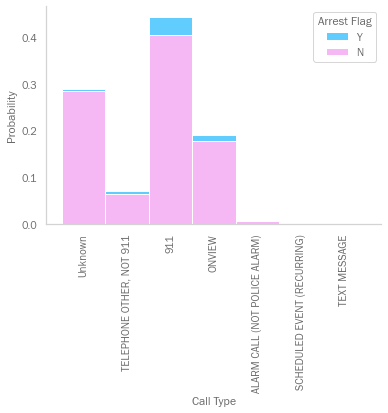

In [71]:
sns.histplot(terry_sort, x='Call Type', hue_order=('Y','N'), hue='Arrest Flag', multiple='stack', stat='probability')
plt.xticks(rotation=90);

### Analyze 'Officer Squad'

Replace nan values with Unknown, 170 unique values.  Binned into Training, Unknown, and Other. Training was most common.

In [72]:
terry_sort['Officer Squad'].unique()

array([nan, 'EAST PCT 3RD W - E/G RELIEF',
       'EAST PCT 1ST W - EDWARD (CHARLIE)',
       'TRAINING - FIELD TRAINING SQUAD', 'EAST PCT 3RD W - GEORGE',
       'EAST PCT 3RD W - EDWARD', 'SOUTH PCT 3RD W - ROBERT',
       'SOUTH PCT 1ST W - ROBERT', 'NORTH PCT 1ST W - UNION',
       'EAST PCT 1ST W - E/G RELIEF (CHARLIE)', 'WEST PCT 2ND W - MARY',
       'NORTH PCT 2ND W - BOY', 'WEST PCT 2ND W - QUEEN',
       'SOUTHWEST PCT 2ND WATCH - F/W RELIEF', 'SOUTH PCT OPS - DAY ACT',
       'NORTH PCT 2ND W - L/U RELIEF', 'NORTH PCT 3RD W - B/N RELIEF',
       'WEST PCT 3RD W - MARY', 'SOUTH PCT 3RD W - OCEAN',
       'WEST PCT 3RD W - KING', 'NORTH PCT 1ST W - LINCOLN',
       'SOUTH PCT 1ST W - R/S RELIEF', 'NORTH PCT 2ND W - JOHN RELIEF',
       'WEST PCT 2ND W - K/Q RELIEF', 'NORTH PCT 2ND W - LINCOLN',
       'WEST PCT 2ND W - DAVID BEATS', 'WEST PCT 2ND W - D/M RELIEF',
       'NORTH PCT 2ND W - NORA', 'EAST PCT 3RD WATCH - CHARLIE RELIEF',
       'SOUTHWEST PCT 2ND W - FRANK', 'EAST

In [73]:
terry_sort['Officer Squad'].fillna('Unknown', inplace=True)

In [74]:
terry_sort['Officer Squad'].value_counts()[:30]

TRAINING - FIELD TRAINING SQUAD          4791
WEST PCT 1ST W - DAVID/MARY              1498
WEST PCT 2ND W - D/M RELIEF               979
SOUTHWEST PCT 2ND W - FRANK               916
NORTH PCT 2ND WATCH - NORTH BEATS         885
WEST PCT 3RD W - DAVID                    804
WEST PCT 1ST W - KING/QUEEN               797
EAST PCT 3RD W - E/G RELIEF               789
WEST PCT 1ST W - KQ/DM RELIEF             788
EAST PCT 1ST W - E/G RELIEF (CHARLIE)     751
EAST PCT 3RD W - EDWARD                   727
NORTH PCT 2ND W - NORA                    717
NORTH PCT 3RD W - B/N RELIEF              695
WEST PCT 2ND W - KING                     687
EAST PCT 2ND W - CHARLIE RELIEF           671
WEST PCT 3RD W - KING                     667
SOUTH PCT 1ST W - R/S RELIEF              650
WEST PCT 2ND W - MARY BEATS               631
WEST PCT 3RD W - MARY                     614
Unknown                                   603
NORTH PCT 3RD W - NORA                    603
WEST PCT 3RD W - QUEEN            

In [75]:
terry_sort[['Officer Squad','Precinct']][:-100]

,Officer Squad,Precinct
0,Unknown,East
1,Unknown,West
2,Unknown,-
3,Unknown,-
4,Unknown,-
...,...,...
45187,EAST PCT 2ND W - E/G RELIEF,East
45188,WEST PCT 2ND W - DAVID BEATS,West
45189,SOUTH PCT 2ND W - ROBERT,-
45190,CRG - SQUAD 81A,West


In [76]:
# It seems to me like most Squads begin with the Precinct except for the Training - Field Training Squad.
# Rather than just deleting the squad, I think binning into Field Training, Other, and Unknown will give us good info.

# Bin into top 10 and then Other
Squad_Bin =[]
for i in range(len(terry_sort)):
    if terry_sort.iloc[i]['Officer Squad'] == 'Unknown':
        Squad_Bin.append('Unknown')
    elif terry_sort.iloc[i]['Officer Squad'] == 'TRAINING - FIELD TRAINING SQUAD':
        Squad_Bin.append('Training')
    else:
        Squad_Bin.append('Other')
        
terry_sort['Squad_Bin'] = Squad_Bin     

In [77]:
terry_sort.drop(columns=('Officer Squad'), inplace=True)

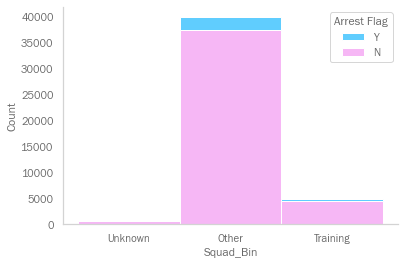

In [78]:
sns.histplot(terry_sort, x='Squad_Bin', hue_order=('Y','N'), hue='Arrest Flag', multiple='stack');

### Analyze 'Arrest Flag'

Target variable.  Fine as is... values N, Y.  Need to address class imbalance.

In [79]:
terry_sort['Arrest Flag'].value_counts() # Definite class imbalance, may need to address

N    42572
Y     2720
Name: Arrest Flag, dtype: int64

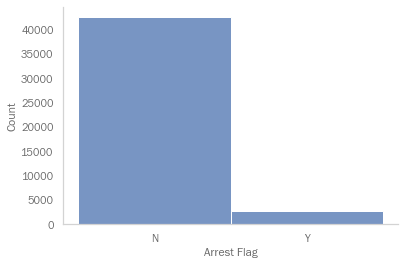

In [80]:
sns.histplot(terry_sort, x='Arrest Flag');

### Analyze 'Frisk Flag'

Changed - to Unknown.  Values N, Y, Unknown

In [81]:
terry_sort['Frisk Flag'].value_counts()

N    34749
Y    10065
-      478
Name: Frisk Flag, dtype: int64

In [82]:
terry_sort['Frisk Flag'] = terry_sort['Frisk Flag'].replace(to_replace='-',value='Unknown')

In [83]:
terry_sort['Frisk Flag'].value_counts()

N          34749
Y          10065
Unknown      478
Name: Frisk Flag, dtype: int64

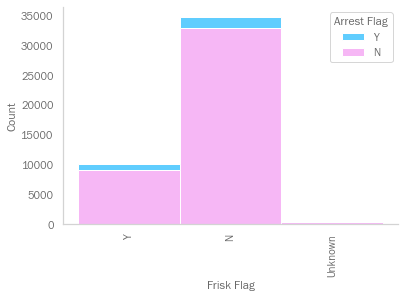

In [84]:
sns.histplot(terry_sort, x='Frisk Flag', hue_order=('Y','N'), hue='Arrest Flag', multiple='stack')
plt.xticks(rotation=90);

### Analyze 'Precinct'

Change - to Unknown, combine Southwest and SouthWest. Eight values including error.

In [85]:
terry_sort['Precinct'].value_counts()

West         10749
North         9962
-             9752
East          5991
South         5413
Southwest     2320
SouthWest      860
Unknown        200
OOJ             30
FK ERROR        15
Name: Precinct, dtype: int64

In [86]:
terry_sort['Precinct'] = terry_sort['Precinct'].replace(to_replace='-',value='Unknown')
terry_sort['Precinct'] = terry_sort['Precinct'].replace(to_replace='SouthWest',value='Southwest')
terry_sort['Precinct'].value_counts()

West         10749
North         9962
Unknown       9952
East          5991
South         5413
Southwest     3180
OOJ             30
FK ERROR        15
Name: Precinct, dtype: int64

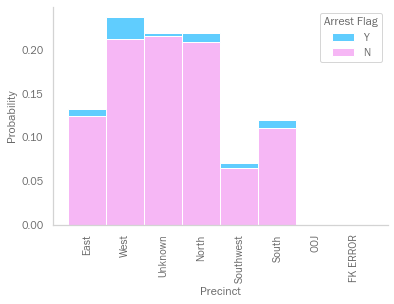

In [87]:
# Interesting amount of Arrests in the West precinct

sns.histplot(terry_sort, x='Precinct', hue_order=('Y','N'), hue='Arrest Flag', multiple='stack', stat='probability')
plt.xticks(rotation=90);

### Analyze 'Sector'

Strip spaces and replace - with Unknown. Left with under 20 values. Too many to work with, will drop.

In [88]:
terry_sort['Sector'].value_counts()

-         9950
E         2337
M         2270
N         2191
K         1762
B         1658
L         1639
K         1520
D         1512
R         1455
F         1378
S         1348
U         1302
O         1161
J         1119
G         1087
M         1065
C         1037
D          996
Q          967
W          941
E          823
Q          653
N          605
O          523
F          515
R          499
S          428
B          409
G          389
U          386
J          349
W          345
C          317
L          303
99          53
Name: Sector, dtype: int64

In [89]:
terry_sort['Sector'] = terry_sort['Sector'].replace(to_replace='-',value='Unknown')
terry_sort['Sector'] = terry_sort['Sector'].map(lambda x: x.strip())
terry_sort['Sector'].value_counts()

Unknown    9950
M          3335
K          3282
E          3160
N          2796
D          2508
B          2067
R          1954
L          1942
F          1893
S          1776
U          1688
O          1684
Q          1620
G          1476
J          1468
C          1354
W          1286
99           53
Name: Sector, dtype: int64

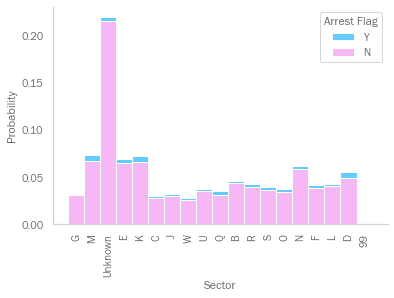

In [90]:
sns.histplot(terry_sort, x='Sector', hue_order=('Y','N'), hue='Arrest Flag', multiple='stack', stat='probability')
plt.xticks(rotation=90);

In [91]:
#terry_sort.drop(columns=('Sector'), inplace = True)

### Analyze 'Beat'

Strip spaces and replace - with Unknown.  I think this is getting very granular in the data.  Perhaps if a particular Precinct and Sector are significant to the models then we can also look at Beat.  But for now I think it just complicates the model too much so I will drop it.

In [92]:
terry_sort['Beat'].value_counts()

-         9897
N3        1175
E2        1092
M2         852
K3         846
          ... 
N1          67
99          53
99          27
OOJ         20
S            2
Name: Beat, Length: 107, dtype: int64

In [93]:
terry_sort['Beat'] = terry_sort['Beat'].replace(to_replace='-',value='Unknown')
terry_sort['Beat'] = terry_sort['Beat'].map(lambda x: x.strip())
terry_sort['Beat'].unique()

array(['G2', 'M3', 'Unknown', 'E3', 'G3', 'E2', 'K3', 'C2', 'C3', 'C1',
       'E1', 'J2', 'G1', 'W2', 'U2', 'Q2', 'K1', 'B3', 'R3', 'S3', 'M1',
       'M2', 'S2', 'O3', 'N2', 'N1', 'F2', 'Q3', 'S1', 'O1', 'U1', 'F3',
       'J1', 'J3', 'Q1', 'L3', 'B2', 'B1', 'L1', 'D3', 'R2', 'N3', 'D2',
       'D1', 'R1', 'K2', 'F1', 'W1', 'L2', 'W3', 'O2', 'U3', '99', 'S',
       'OOJ'], dtype=object)

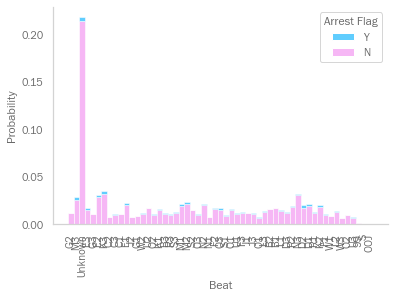

In [94]:
# Don't see an obvious standout values
sns.histplot(terry_sort, x='Beat', hue_order=('Y','N'), hue='Arrest Flag', multiple='stack', stat='probability')
plt.xticks(rotation=90);

In [95]:
terry_sort.drop(columns='Beat', inplace=True)

## Rename variables and visualize relationships

In [96]:
# First let's fix all of the variable names so they don't have spaces
terry_sort.columns = terry_sort.columns.str.replace(' ', '_')
terry_sort.columns

Index(['Subject_Age_Group', 'Stop_Resolution', 'Weapon_Type', 'Officer_Gender',
       'Officer_Race', 'Subject_Perceived_Race', 'Subject_Perceived_Gender',
       'Call_Type', 'Arrest_Flag', 'Frisk_Flag', 'Precinct', 'Sector',
       'Subject_Known', 'Officer_Bin', 'Officer_DOB', 'Date', 'Month', 'Year',
       'Day', 'Squad_Bin'],
      dtype='object')

In [97]:
terry_sort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45292 entries, 0 to 45291
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Subject_Age_Group         45292 non-null  object  
 1   Stop_Resolution           45292 non-null  object  
 2   Weapon_Type               45292 non-null  object  
 3   Officer_Gender            45292 non-null  object  
 4   Officer_Race              45292 non-null  object  
 5   Subject_Perceived_Race    45292 non-null  object  
 6   Subject_Perceived_Gender  45292 non-null  object  
 7   Call_Type                 45292 non-null  object  
 8   Arrest_Flag               45292 non-null  object  
 9   Frisk_Flag                45292 non-null  object  
 10  Precinct                  45292 non-null  object  
 11  Sector                    45292 non-null  object  
 12  Subject_Known             45292 non-null  object  
 13  Officer_Bin               45292 non-null  obje

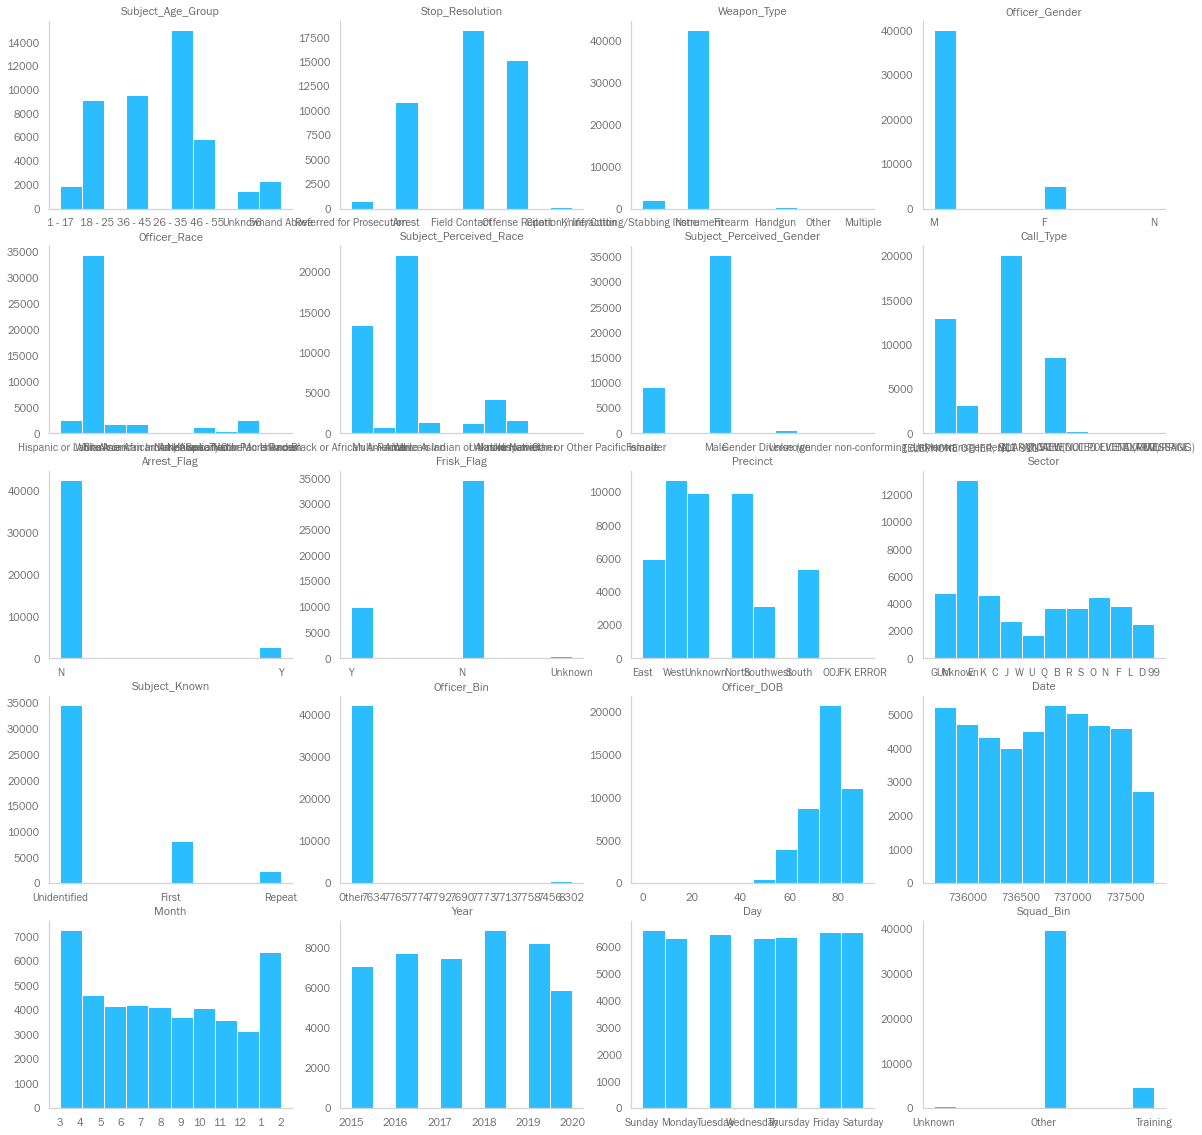

In [98]:
fig, axes = plt.subplots(nrows=5, ncols=4,figsize=(20,20))
plt.title('Graphs')
y = terry_sort['Arrest_Flag']
for n in range(len(terry_sort.columns)):
    row=(n)//4
    col=n%4
    ax=axes[row][col]
    x=terry_sort.iloc[:,n]
    ax.hist(x)
    ax.set_title(terry_sort.columns.values[n])
# plt.savefig('images/initial_distributions.png')
plt.show()

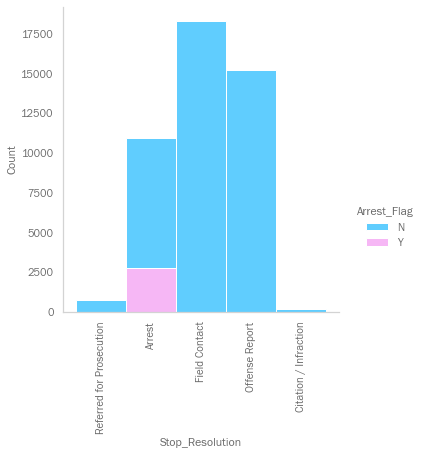

In [99]:
# Examining Stop Resolution again.  I think it may be a confounding variable. Will probably have to remove it.
sns.displot(terry_sort, x='Stop_Resolution', hue='Arrest_Flag', multiple='stack')
plt.xticks(rotation=90);

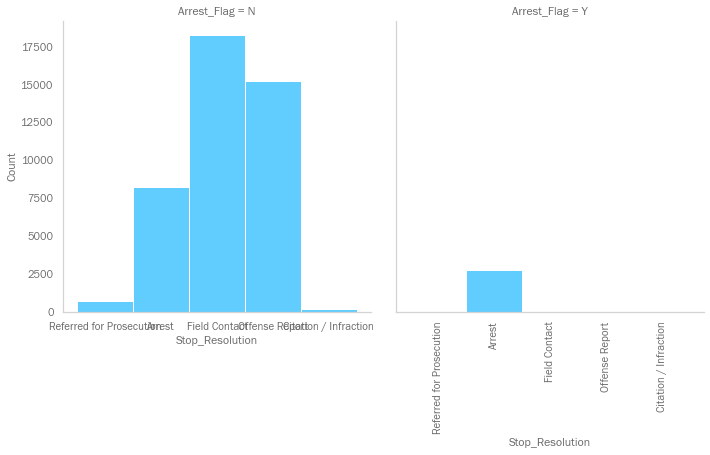

In [100]:
sns.displot(terry_sort, x='Stop_Resolution', col='Arrest_Flag', multiple='dodge')
plt.xticks(rotation=90);

In [101]:
# Then change our target variable to binary encoding (0 or 1 instead of N or Y)
terry_sort['Arrest_Flag']=terry_sort['Arrest_Flag'].replace(to_replace = 'Y', value = 1).replace(to_replace = 'N', value = 0)
y = terry_sort['Arrest_Flag']

In [102]:
terry_sort.columns

Index(['Subject_Age_Group', 'Stop_Resolution', 'Weapon_Type', 'Officer_Gender',
       'Officer_Race', 'Subject_Perceived_Race', 'Subject_Perceived_Gender',
       'Call_Type', 'Arrest_Flag', 'Frisk_Flag', 'Precinct', 'Sector',
       'Subject_Known', 'Officer_Bin', 'Officer_DOB', 'Date', 'Month', 'Year',
       'Day', 'Squad_Bin'],
      dtype='object')

In [103]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'Arrest_Flag ~ C(Subject_Age_Group) + C(Sector) + C(Weapon_Type) + C(Subject_Perceived_Race) + C(Subject_Perceived_Gender) + C(Call_Type) + C(Frisk_Flag) + C(Subject_Known) + C(Officer_DOB) + Date + C(Month) + C(Day) + C(Year) + C(Officer_Race) + C(Officer_Gender) + C(Stop_Resolution) + C(Squad_Bin) + C(Officer_Bin) + C(Precinct)'
lm = ols(formula, terry_sort).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

LinAlgError: SVD did not converge

In [ ]:
# Making a smaller subset of data in case my df is too big and unweildy
current_years = terry_sort[(terry_sort['Year']=='2020') | (terry_sort['Year']=='2019')]
current_years.shape
early_years = terry_sort[(terry_sort['Year']=='2015') | (terry_sort['Year']=='2016')]
early_years.shape

## Train, test, split
**Output** - X_train, X_test, y_train, y_test, train_df, test_df

In [ ]:
X = terry_sort.drop(columns='Arrest_Flag')
y = terry_sort['Arrest_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)
train_df = pd.concat([X_train, y_train], axis=1) 
test_df = pd.concat([X_test, y_test], axis=1)

print('X_train: ', X_train.shape, '\nX_test: ', X_test.shape)

## Perform SMOTE for class imbalance
**Output** - X_train_resampled, y_train_resampled  (still X_test and y_test)

In [ ]:
X_train.columns # Column 14 is our one numerical column, the rest are categorical

In [ ]:
#  One of the labs did SMOTE before the train test split.  I think maybe it is better to do after the split so I am
#   not making any changes to my test data.  However, I have learned to do it before to OHE or my dummy variables may
# get incorrect values.
from imblearn.over_sampling import SMOTENC
# Previous original class distribution
print('Original class distribution: \n')
print(y.value_counts())

smote = SMOTENC(random_state=10, categorical_features=[0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17])
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

In [ ]:
X_train_resampled.Year.value_counts()

In [ ]:
X_train_resampled.Weapon_Type.value_counts()

In [ ]:
X_train_resampled.Date.value_counts()

In [ ]:
X_test.Date.isna().value_counts()

In [ ]:
X_test

## Get dummy variables for categoricals (OHE)
**Output** - X_train_encoded, X_test_encoded dataframes (still y_train_resampled and y_test)

In [ ]:
enc = OneHotEncoder(sparse=False)
X_cat = X.drop(columns='Date')
enc.fit(X_cat)  # Need to fit on train and test together because there are some Officer_ID values in the test set that aren't in train
X_train_code = enc.transform(X_train_resampled.drop(columns='Date'))
X_test_code = enc.transform(X_test.drop(columns='Date'))

In [ ]:
# The transforms are not dataframe yet and we have to add back in the continuous column of Date
X_train_encoded = pd.DataFrame(X_train_code, columns=enc.get_feature_names(X_cat.columns), index=X_train_resampled.index)
X_train_encoded['Date'] = X_train_resampled.Date
X_test_encoded = pd.DataFrame(X_test_code, columns=enc.get_feature_names(X_cat.columns), index=X_test.index)
X_test_encoded['Date'] = X_test.Date
X_test_encoded.head()

In [ ]:
# Checking that the df looks right
X_train_resampled.iloc[0]

In [ ]:
y_train_resampled.value_counts()

In [ ]:
X_train_encoded.shape

In [ ]:
X_train_encoded.columns[0:100]

In [ ]:
X_train_encoded.columns # Some column names have spaces and special characters now.  May have to address.

In [ ]:
X_train_encoded.Year_2019.value_counts() # just 0s and 1s, unlike when I ohe before resampling

In [ ]:
# let's fix all of the variable names so they don't have spaces
X_train_encoded.columns = X_train_encoded.columns.str.replace(' ', '_')
X_train_encoded.columns = X_train_encoded.columns.str.replace('-', '_')
X_train_encoded.columns = X_train_encoded.columns.str.replace('/', '_')
X_train_encoded.columns

In [ ]:
# let's fix all of the variable names so they don't have spaces
X_test_encoded.columns = X_test_encoded.columns.str.replace(' ', '_')
X_test_encoded.columns = X_test_encoded.columns.str.replace('-', '_')
X_test_encoded.columns = X_test_encoded.columns.str.replace('/', '_')
X_test_encoded.columns

## Scale Variables

Output - scaler, scaled_X_train, scaled_X_test (still y_train_resampled and y_test)

In [ ]:
X_train_encoded.Date.value_counts()

In [ ]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train_encoded)
scaled_data_test = scaler.transform(X_test_encoded)

# Convert into a DataFrame
scaled_X_train = pd.DataFrame(scaled_data_train, columns=X_train_encoded.columns)
scaled_X_test = pd.DataFrame(scaled_data_test, columns=X_train_encoded.columns)
scaled_X_test.head()

In [ ]:
'''Although it doesn't look as pretty, this has no negative effect on the model. Each 1 and 0 have been
replaced with corresponding decimal values, but each binary column still only contains 2 values, meaning
the overall information content of each column has not changed.'''
scaled_X_train['Subject_Age_Group_56_and_Above'].value_counts()

In [ ]:
scaled_X_train.Date.value_counts()

In [ ]:
scaled_X_test.isna().sum().sum()

## Define model metrics

**Output** - print_roc(), print_confusion_matrices(), print_metrics()

> This seems like a good place to look at what a false positive and false negative would be.  I have coded an arrest as the positive case.  So a false positive is predicting an arrest when no arrest was made.  A false negative would be predicting NO arrest when an arrest was made.  This model won't be used to predict future cases of Terry Stops, it is just to analyze past decisions.  Therefore, I think the most important metric will be accuracy.  How accurately did my model predict the actual data that I was given?  This will give us the most useful information about how the decisions appear to have been influenced by the variables examined.

In [ ]:
def print_roc(false_positive_rate, true_positive_rate):    
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print('AUC: {}'.format(auc(false_positive_rate, true_positive_rate)))
    print('----------------------------------------------')
    plt.plot(false_positive_rate, true_positive_rate, color='blue', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/10.0 for i in range(11)])
    plt.xticks([i/10.0 for i in range(11)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [ ]:
def print_confusion_matrices(model, X_train, X_test, y_train, y_test, y_train_preds, y_test_preds):
    print('\nTRAIN Confusion Matrix')
    print('----------------')
    plot_confusion_matrix(model, X_train, y_train, values_format='.8g')
    print("Number of mislabeled training points out of a total {} points : {}, percentage = {:.4%}"
          .format(X_train.shape[0], (y_train != y_train_preds).sum(), (y_train != y_train_preds).sum()/X_train.shape[0]))
    plt.show()
    print('\nTEST Confusion Matrix')
    print('----------------')
    plot_confusion_matrix(model, X_test, y_test, values_format='.4g')
    print("Number of mislabeled test points out of a total {} points : {}, percentage = {:.4%}"
          .format(X_test.shape[0], (y_test != y_test_preds).sum(), (y_test != y_test_preds).sum()/X_test.shape[0]))
    plt.show()

In [ ]:
def print_metrics(model, X_train, X_test, y_train, y_test, y_train_preds, y_test_preds):
    
    # Print scores
    print("Precision Score: Train {0:.5f}, Test {1:.5f}"
          .format(precision_score(y_train, y_train_preds), precision_score(y_test, y_test_preds)))
    print("Recall Score:\t Train {0:.5f}, Test {1:.5f}"
          .format(recall_score(y_train, y_train_preds), recall_score(y_test, y_test_preds)))
    print("Accuracy Score:\t Train {0:.5f}, Test {1:.5f}"
          .format(accuracy_score(y_train, y_train_preds), accuracy_score(y_test, y_test_preds)))
    print("F1 Score:\t Train {0:.5f}, Test {1:.5f}"
          .format(f1_score(y_train, y_train_preds), f1_score(y_test, y_test_preds)))
    print('----------------')
    
    # Create and print train & test confusion matrices 
    print_confusion_matrices(model, X_train, X_test, y_train, y_test, y_train_preds, y_test_preds)
    print('----------------')  
    
    # print classification report
    print(classification_report(y_test, y_test_preds))
    
    # Check the AUC for predictions
    if str(model)[:3] == 'Log':
        y_score = model.fit(X_train, y_train).decision_function(X_test)
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score)
        print_roc(false_positive_rate, true_positive_rate)
        print('----------------')
    
    if str(model)[:3] == 'Dec':
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_preds)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        print('\nAUC is :{0}'.format(round(roc_auc, 2)))
        fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (12,12), dpi=500)
        tree.plot_tree(model, feature_names = X_train.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
        plt.show()
    

In [ ]:
def run_model(model, X_train, X_test, y_train, y_test):
    
#     model_metrics['model']=[]
    
    tic = time.time()
    model.fit(X_train, y_train)
    
    # Calculate train and test predictions
    y_test_preds = model.predict(X_test)
    y_train_preds = model.predict(X_train)
    
    toc = time.time()
    run_time = toc-tic
    print('Run time: ', run_time)
    print_metrics(model, X_train, X_test, y_train, y_test, y_train_preds, y_test_preds)

In [ ]:
def plot_feature_importances(model, X_train):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

## Logistic Regression

**Output** - logreg1, logreg2

### Initial Logistic Regression model
<pre>
Precision Score: Train 0.98840, Test 0.95781  
Recall Score:    Train 0.98978, Test 0.94715  
Accuracy Score:  Train 0.98908, Test 0.98077  
F1 Score:        Train 0.98909, Test 0.95245
</pre>

In [ ]:
logreg1 = LogisticRegression(fit_intercept=False, C=1e20, solver='lbfgs')

run_model(logreg1, scaled_X_train, scaled_X_test, y_train_resampled, y_test)

print(cross_val_score(logreg1,scaled_X_train,y_train_resampled))

### Logistic Regression with solver saga (faster for large datasets)
<pre>
Precision Score: Train 0.92243, Test 0.92820  
Recall Score:    Train 0.98651, Test 0.98887  
Accuracy Score:  Train 0.98181, Test 0.98219  
F1 Score:        Train 0.95339, Test 0.95758
</pre>

In [ ]:
logreg2 = LogisticRegression(fit_intercept=False, C=1e20, penalty='elasticnet', solver='saga', l1_ratio=.50)

run_model(logreg2, scaled_X_train, scaled_X_test, y_train_resampled, y_test)

## KNN models
**Output** - knn1 - knn3, find_best_k()

Ran on ohe and scaled data

### Initial KNN (default of 5)
<pre>
Precision Score: Train 0.66926, Test 0.30212  
Recall Score:    Train 0.99919, Test 0.99166  
Accuracy Score:  Train 0.75270, Test 0.53265  
F1 Score:        Train 0.80160, Test 0.46314
</pre>

In [ ]:
knn1 = KNeighborsClassifier()

run_model(knn1, scaled_X_train, scaled_X_test, y_train_resampled, y_test)

In [ ]:
def find_best_k(X_train, X_test, y_train, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    tic = time.time()
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    toc = time.time()
    run_time = toc-tic
    print('Run time: ', run_time)
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [ ]:
find_best_k(scaled_X_train, scaled_X_test, y_train_resampled, y_test)

### KNN with calculated best k of 25
<pre>
Precision Score: Train 0.69146, Test 0.65816
Recall Score:    Train 0.37635, Test 0.36027
Accuracy Score:  Train 0.82444, Test 0.81853
F1 Score:        Train 0.48741, Test 0.46565
</pre>

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=25, weights='uniform', algorithm='auto', 
                           leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
knn2.fit(scaled_X_train, y_train)

print_metrics(knn2, scaled_X_train, scaled_X_test, y_train, y_test)

### KNN with calculated best k of 25, weights = 'distance'
<pre>
Precision Score: Train 0.99980, Test 0.64590
Recall Score:    Train 0.99880, Test 0.35905
Accuracy Score:  Train 0.99969, Test 0.81613
F1 Score:        Train 0.99930, Test 0.46154
</pre>

In [ ]:
knn3 = KNeighborsClassifier(n_neighbors=25, weights='distance', algorithm='auto', 
                           leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
knn3.fit(scaled_X_train, y_train)

print_metrics(knn3, scaled_X_train, scaled_X_test, y_train, y_test)

## Bayes Classification

**Output** - gnb1-4

Ran on ohe data **but not scaled** data, scaling won't affect probabilities

### Initial Gaussian Naive Bayes  
<pre>
Precision Score: Train 1.00000, Test 1.00000  
Recall Score:    Train 0.97501, Test 0.85675  
Accuracy Score:  Train 0.99529, Test 0.97088  
F1 Score:        Train 0.98735, Test 0.92285
</pre>

In [ ]:
gnb1 = GaussianNB()

run_model(gnb1, X_train_encoded, X_test_encoded, y_train_resampled, y_test)

### Gaussian Naive Bayes on class balanced data (SMOTE)  
<pre>
Precision Score: Train 1.00000, Test 1.00000  
Recall Score:    Train 0.93762, Test 0.59388  
Accuracy Score:  Train 0.96881, Test 0.91744  
F1 Score:        Train 0.96781, Test 0.74520
</pre>

In [ ]:
gnb2 = GaussianNB() # trying out the SMOTE data
gnb2.fit(X_train_resampled, y_train_resampled)

print_metrics(gnb2, X_train_resampled, X_test, y_train_resampled, y_test)

### Bernoulli Naive Bayes

Can't seem to run ComplementNB, CategoricalNB, or MultinomialNB because of negative values.  Need to understand how to choose which model.
<pre>
Precision Score: Train 0.48894, Test 0.47371
Recall Score:    Train 0.51363, Test 0.50911
Accuracy Score:  Train 0.77307, Test 0.76813
F1 Score:        Train 0.50098, Test 0.49078
</pre>

In [ ]:
gnb3 = BernoulliNB() 
gnb3.fit(X_train, y_train)

print_metrics(gnb3, X_train, X_test, y_train, y_test)

### Bernoulli Naive Bayes on SMOTE data
<pre>
Precision Score: Train 0.85860, Test 0.54216
Recall Score:    Train 0.70326, Test 0.47266
Accuracy Score:  Train 0.79372, Test 0.79667
F1 Score:        Train 0.77320, Test 0.50503
</pre>

In [ ]:
gnb4 = BernoulliNB() 
gnb4.fit(X_train_resampled, y_train_resampled)

print_metrics(gnb4, X_train_resampled, X_test, y_train_resampled, y_test)

## Decision Tree
**Output** - dt1 - dt7, plot_feature_performances()

Ran on ohe data  * **but not scaled** * data

### Initial Decision Tree
<pre>
Precision Score: Train 0.99980, Test 0.39812
Recall Score:    Train 0.99880, Test 0.41069
Accuracy Score:  Train 0.99969, Test 0.73440
F1 Score:        Train 0.99930, Test 0.40431
</pre>

In [ ]:
dt1 = DecisionTreeClassifier(criterion='entropy', random_state=10) # try with default GINI impurity next time

run_model(dt1, X_train_encoded, X_test_encoded, y_train_resampled, y_test)

### Decision Tree with Gini instead of Entropy
<pre>
Precision Score: Train 0.99980, Test 0.39200
Recall Score:    Train 0.99880, Test 0.42892
Accuracy Score:  Train 0.99969, Test 0.72867
F1 Score:        Train 0.99930, Test 0.40963
</pre>

In [ ]:
dt2 = DecisionTreeClassifier(random_state=10) # with GINI default

run_model(dt2, X_train_encoded, X_test_encoded, y_train_resampled, y_test)

### Decision Tree with Max Depth
Optimal Max_depth = 4  
<pre>
Precision Score: Train 0.67785, Test 0.66152
Recall Score:    Train 0.36433, Test 0.36452
Accuracy Score:  Train 0.82062, Test 0.81960
F1 Score:        Train 0.47393, Test 0.47004
</pre>

In [ ]:
# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 32, 2, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt3 = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=10)
   dt3.fit(X_train_encoded, y_train_resampled)
   dt3_train_preds = dt3.predict(X_train_encoded)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled, dt3_train_preds)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   dt3_preds = dt3.predict(X_test_encoded)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, dt3_preds)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

In [ ]:
# Training error decreases with increasing tree depth - clear sign of overfitting 
# Test error increases after depth=3 - nothing more to learn from deeper trees (some fluctuations, but not stable)
# Optimal value seen here is 4

In [ ]:
# Create the classifier, fit it on the training data and make predictions on the test set
dt3 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=10) 
dt3.fit(X_train, y_train)

print_metrics(dt3, X_train, X_test, y_train, y_test)

### Decision Tree with Min Samples Split
Optimal min_samples_split = 0.4  
<pre>
Precision Score: Train 0.69407, Test 0.68333
Recall Score:    Train 0.27916, Test 0.27400
Accuracy Score:  Train 0.81284, Test 0.81280
F1 Score:        Train 0.39817, Test 0.39115
</pre>

In [ ]:
# Identify the optimal min-samples-split for given data
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt4 = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split, random_state=10)
   dt4.fit(X_train, y_train)
   dt4_train_preds = dt4.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, dt4_train_preds)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   dt4_preds = dt4.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, dt4_preds)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()

In [ ]:
# AUC for both test and train data stabilizes at 0.4
# Further increase in minimum sample split does not improve learning 

In [ ]:
# Create the classifier, fit it on the training data and make predictions on the test set
dt4 = DecisionTreeClassifier(criterion='entropy', min_samples_split=0.4, random_state=10) 
dt4.fit(X_train, y_train)

print_metrics(dt4, X_train, X_test, y_train, y_test)

### Decision Tree with Min Samples Leaf
Optimal min_samples_leaf = 0.10  
<pre>
Precision Score: Train 0.55267, Test 0.56684
Recall Score:    Train 0.32806, Test 0.33232
Accuracy Score:  Train 0.79209, Test 0.79773
F1 Score:        Train 0.41172, Test 0.41900
</pre>

In [ ]:
# Calculate the optimal value for minimum sample leafs
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt5 = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf, random_state=10)
   dt5.fit(X_train, y_train)
   train_pred = dt5.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt5.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

In [ ]:
# AUC gives best value at 0.1 for both test and training sets 
# Setting a higher minimum per leaf restricts our model too much
# The accuracy drops down if we continue to increase the parameter value 

In [ ]:
# Create the classifier, fit it on the training data and make predictions on the test set
dt5 = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=0.10, random_state=10) 
dt5.fit(X_train, y_train)

print_metrics(dt5, X_train, X_test, y_train, y_test)

### Decision Tree with Max Features
Optimal max_features = 46  
<pre>
Precision Score: Train 0.99980, Test 0.41353
Recall Score:    Train 0.99880, Test 0.42710
Accuracy Score:  Train 0.99969, Test 0.74133
F1 Score:        Train 0.99930, Test 0.42020
</pre>

In [ ]:
max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   dt6 = DecisionTreeClassifier(criterion='entropy', max_features=max_feature, random_state=10)
   dt6.fit(X_train, y_train)
   train_pred = dt6.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt6.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()

In [ ]:
# No clear effect on the training dataset - flat AUC 
# Some fluctuations in test AUC but not definitive enough to make a judgement
# Highest AUC value seen at 45

In [ ]:
dt6 = DecisionTreeClassifier(criterion='entropy', max_features=46, random_state=10) 
dt6.fit(X_train, y_train)

print_metrics(dt6, X_train, X_test, y_train, y_test)

### Decision Tree with All Optimal Parameters
Optimal Max_depth = 4  
Optimal min_samples_split = 0.4  
Optimal min_samples_leaf = 0.10  
Optimal max_features = 46  
<pre>
Precision Score: Train 0.55267, Test 0.56684
Recall Score:    Train 0.32806, Test 0.33232
Accuracy Score:  Train 0.79209, Test 0.79773
F1 Score:        Train 0.41172, Test 0.41900
</pre>

In [ ]:
# Create the classifier, fit it on the training data and make predictions on the test set
dt7 = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=0.4, 
                              min_samples_leaf=0.10, max_features=46, random_state=10) 
dt7.fit(X_train, y_train)

print_metrics(dt7, X_train, X_test, y_train, y_test)

In [ ]:
# Max Depth appears to have had the best impact on our model

In [ ]:
plot_feature_importances(dt7, X_train)

## Ensemble Methods
**Output** - bagged_tree, forest, rf_tree_1

Ran on ohe data  * **but not scaled** * data

### Bagged Tree
<pre>
Precision Score: Train 0.70514, Test 0.68254
Recall Score:    Train 0.34890, Test 0.33961
Accuracy Score:  Train 0.82324, Test 0.82040
F1 Score:        Train 0.46682, Test 0.45355
</pre>

In [ ]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)

run_model(bagged_tree, X_train_encoded, X_test_encoded, y_train_resampled, y_test)

### Random Forest
<pre>
Precision Score: Train 0.72932, Test 0.70556
Recall Score:    Train 0.23327, Test 0.23147
Accuracy Score:  Train 0.81076, Test 0.81013
F1 Score:        Train 0.35348, Test 0.34858
</pre>

In [ ]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)

run_model(forest, X_train_encoded, X_test_encoded, y_train_resampled, y_test)

In [ ]:
plot_feature_importances(forest, X_train_encoded)

In [ ]:
rf_tree_1 = forest.estimators_[0]
plot_feature_importances(rf_tree_1, X_train_encoded)

## Grid Search
**Output** - gs_clf, gs_tree, gs_param_grid, dt_gs_training_score, dt_gs_testing_score, rf_clf, mean_rf_cv_score, rf_param_grid, rf_grid_search, dt_score, rf_score 


Ran on ohe data  * **but not scaled** * data

### Grid Search with Decision Tree
Optimal criterion = 'entropy'  
Optimal min_samples_split = 0.1  
Optimal max_depth = 10    
<pre>
Precision Score: Train 0.69008, Test 0.67181
Recall Score:    Train 0.30120, Test 0.29101
Accuracy Score:  Train 0.81502, Test 0.81320
F1 Score:        Train 0.41936, Test 0.40610
</pre>

In [ ]:
gs_clf = DecisionTreeClassifier()

gs_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 5, 10, 20],
    'min_samples_split': [.1, .3, .7, .9]
}

gs_tree = GridSearchCV(gs_clf, gs_param_grid, cv=3, return_train_score=True)
gs_tree.fit(X_train, y_train)

# Mean training score
dt_gs_training_score = np.mean(gs_tree.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = gs_tree.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")

gs_tree.best_params_

In [ ]:
print_metrics(gs_tree, X_train, X_test, y_train, y_test)

### Grid Search with Random Forest
Optimal criterion = 'gini'  
Optimal min_samples_split = 5
Optimal min_samples_leaf = 3
Optimal max_depth = 10    
Optimal num_estimators = 100
<pre>
Precision Score: Train 0.77800, Test 0.67933
Recall Score:    Train 0.39118, Test 0.34751
Accuracy Score:  Train 0.84022, Test 0.82080
F1 Score:        Train 0.52060, Test 0.45981
</pre>

In [ ]:
rf_clf = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X_train, y_train, cv=3))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

In [ ]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

In [ ]:
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

In [ ]:
dt_score = gs_tree.score(X_test, y_test)
rf_score = rf_grid_search.score(X_test, y_test)

print('Decision tree grid search: ', dt_score)
print('Random forest grid search: ', rf_score)

In [ ]:
print_metrics(rf_grid_search, X_train, X_test, y_train, y_test)

## Boosting Models
**Output** - xgb_clf, grid_xgb, xgb_train_preds, xgb_test_preds, training_accuracy, test_accuracy, xgb_param_grid, grid_xgb_train_preds, grid_xgb_test_preds, xgb_best_parameters, adaboost_clf, gbt_clf

Ran on ohe data  * **but not scaled** * data

### AdaBoost
<pre>
Precision Score: Train 0.68087, Test 0.69027
Recall Score:    Train 0.33307, Test 0.33171
Accuracy Score:  Train 0.81747, Test 0.82067
F1 Score:        Train 0.44732, Test 0.44809
</pre>

In [ ]:
adaboost_clf = AdaBoostClassifier(random_state=42)
adaboost_clf.fit(X_train, y_train)

print_metrics(adaboost_clf, X_train, X_test, y_train, y_test)

In [ ]:
print('Mean Adaboost Cross-Val Score (k=5):')
print(cross_val_score(adaboost_clf, X, y, cv=5).mean())

### GradientBoost
<pre>
Precision Score: Train 0.70564, Test 0.67200
Recall Score:    Train 0.37134, Test 0.35723
Accuracy Score:  Train 0.82622, Test 0.82067
F1 Score:        Train 0.48661, Test 0.46648
</pre>

In [ ]:
gbt_clf = GradientBoostingClassifier(random_state=42)
gbt_clf.fit(X_train, y_train)


print_metrics(gbt_clf, X_train, X_test, y_train, y_test)

In [ ]:
print('Mean GBT Cross-Val Score (k=5):')
print(cross_val_score(gbt_clf, X, y, cv=5).mean())

### Initial XGBoost
<pre>
Precision Score: Train 0.70337, Test 0.67795
Recall Score:    Train 0.36353, Test 0.35298
Accuracy Score:  Train 0.82484, Test 0.82120
F1 Score:        Train 0.47932, Test 0.46424
</pre>

In [ ]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

# Predict on training and test sets
xgb_train_preds = xgb_clf.predict(X_train)
xgb_test_preds = xgb_clf.predict(X_test)

# Accuracy of training and test sets
xgb_training_accuracy = accuracy_score(y_train, xgb_train_preds)
xgb_test_accuracy = accuracy_score(y_test, xgb_test_preds)

print('Training Accuracy: {:.4}%'.format(xgb_training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(xgb_test_accuracy * 100))
print('------------------')
print_metrics(xgb_clf, X_train, X_test, y_train, y_test)

### XGBoost with grid search
Grid Search found the following optimal parameters:  
learning_rate: 0.1  
max_depth: 6  
min_child_weight: 1  
n_estimators: 100  
subsample: 0.7  
<pre>
Precision Score: Train 0.79205, Test 0.65733
Recall Score:    Train 0.43507, Test 0.35662
Accuracy Score:  Train 0.84938, Test 0.81800
F1 Score:        Train 0.56163, Test 0.46239
</pre>

In [ ]:
xgb_param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [ ]:
grid_xgb = GridSearchCV(xgb_clf, xgb_param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_xgb.fit(X_train, y_train)

xgb_best_parameters = grid_xgb.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(xgb_best_parameters.keys()):
    print('%s: %r' % (param_name, xgb_best_parameters[param_name]))

grid_xgb_train_preds = grid_xgb.predict(X_train)
grid_xgb_test_preds = grid_xgb.predict(X_test)
grid_xgb_training_accuracy = accuracy_score(y_train, grid_xgb_train_preds)
grid_xgb_test_accuracy = accuracy_score(y_test, grid_xgb_test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(grid_xgb_training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(grid_xgb_test_accuracy * 100))

In [ ]:
print_metrics(grid_xgb, X_train, X_test, y_train, y_test)

## Support Vector Classification

In [ ]:
from sklearn.svm import SVC  
from time import time
tic = time()
svclassifier = SVC(kernel='rbf', C=1000)  
svclassifier.fit(X_train, y_train) 
y_pred = svclassifier.predict(X_test)
toc = time()
print("run time is {} seconds".format(toc-tic))

In [ ]:
print_metrics(svclassifier, X_train, X_test, y_train, y_test)

## Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
scaled_pipeline_1 = Pipeline([('ss', StandardScaler()), 
                              ('svc', SVC(kernel='rbf', C=1000))])
scaled_pipeline_1.fit(X_train, y_train)
scaled_pipeline_1.score(X_test, y_test)

In [ ]:
scaled_pipeline_2 = Pipeline([('ss', StandardScaler()), 
                              ('RF', RandomForestClassifier(random_state=123))])

grid = [{'RF__max_depth': [4, 5], 
         'RF__min_samples_split': [5, 10], 
         'RF__min_samples_leaf': [3, 5]}]

In [ ]:
gridsearch = GridSearchCV(estimator=scaled_pipeline_2, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=5)

gridsearch.fit(X_train, y_train)
gridsearch.score(X_test, y_test)

In [ ]:
gridsearch.best_params_

In [ ]:
scaled_pipeline_3 = Pipeline([('ss', StandardScaler()), 
                              ('RF', RandomForestClassifier(max_depth=5,
                                                           min_samples_leaf=3,
                                                           min_samples_split=5))])
scaled_pipeline_3.fit(X_train, y_train)

In [ ]:
print_metrics(scaled_pipeline_3, X_train, X_test, y_train, y_test)

In [ ]:
scaled_pipeline_3['RF'].feature_importances_